# Dataset Description

__File descriptions__

- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


__Data fields__

Here's a brief version of what you'll find in the data description file.

- SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# Import Modules and Dataset
## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import scipy.stats as stats
import missingno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\pyproj\__init__.py:73: UserWarning:

Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.

PROJ: proj_create_from_database: Cannot find proj.db


## Import Dataset

In [2]:
pd.set_option("display.max_columns", None)
df_train = pd.read_csv("dataset/train.csv")
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
df_test = pd.read_csv("dataset/test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

# Data Understanding
## Check Data Type

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
df_test["MSSubClass"] = df_test["MSSubClass"].astype(str)

## Check Duplicates

In [6]:
df_train.duplicated().sum()

0

## Check Missing Values

<AxesSubplot: >

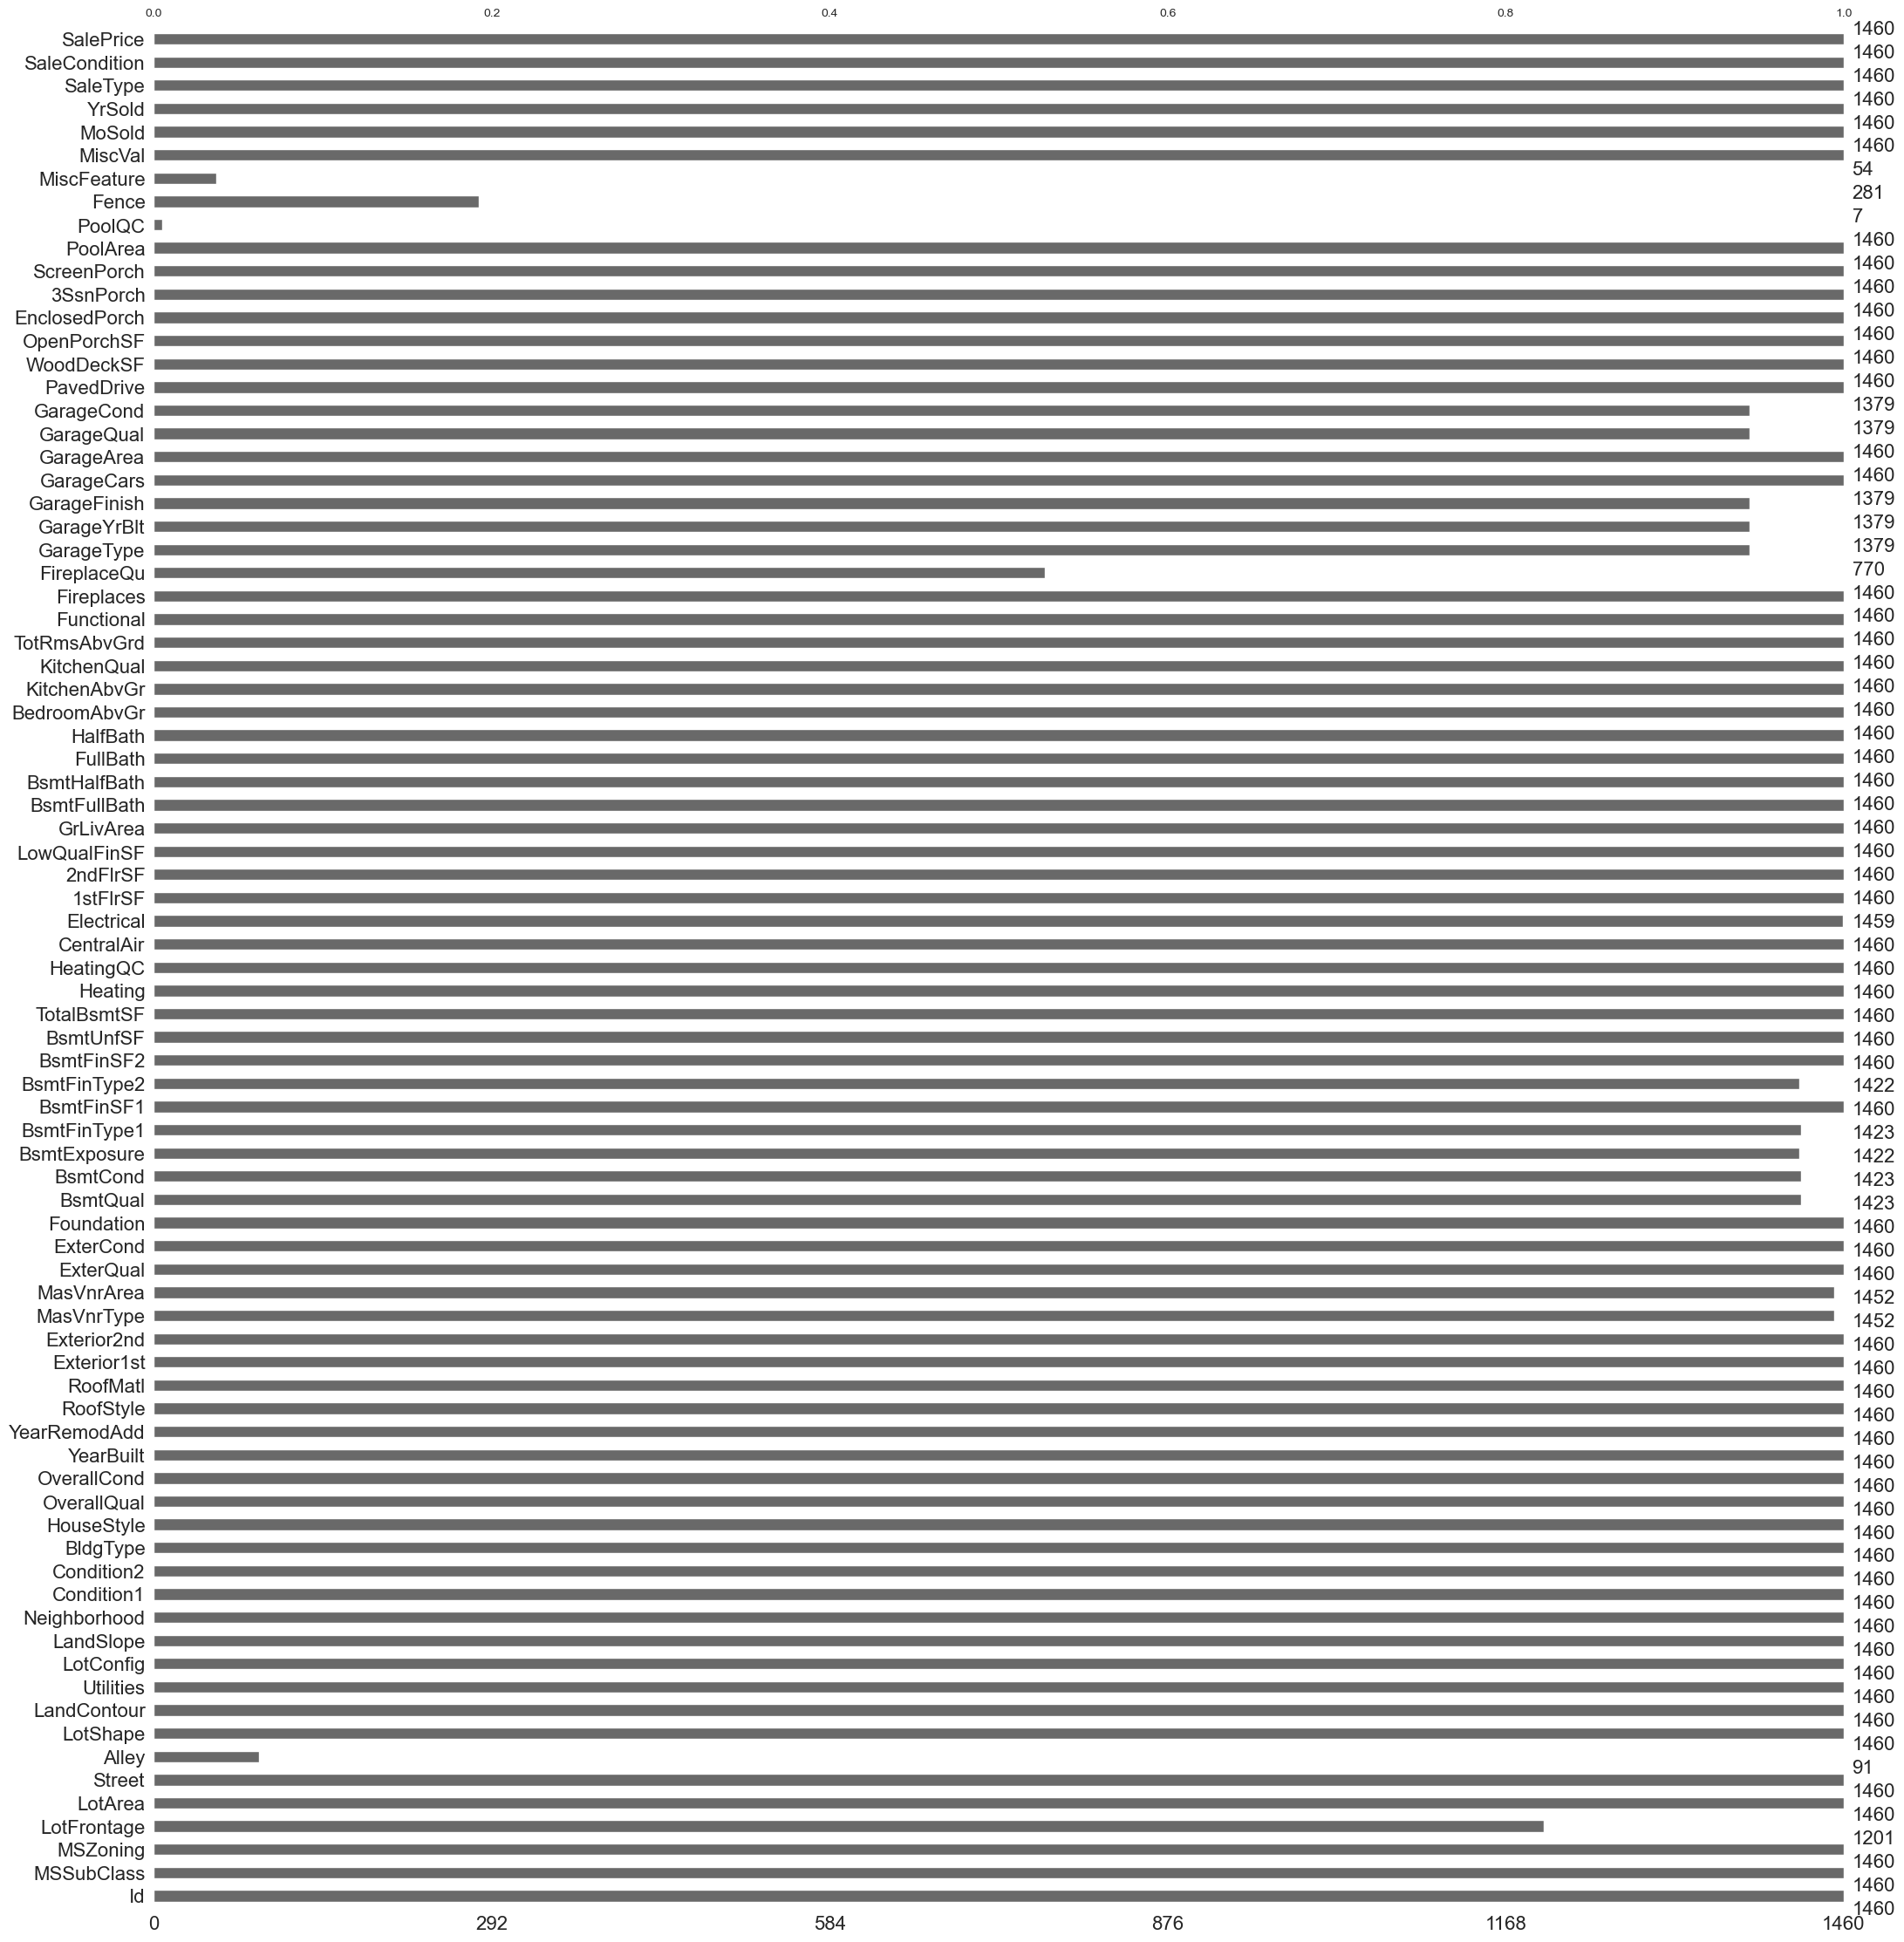

In [7]:
missingno.bar(df_train)

<AxesSubplot: >

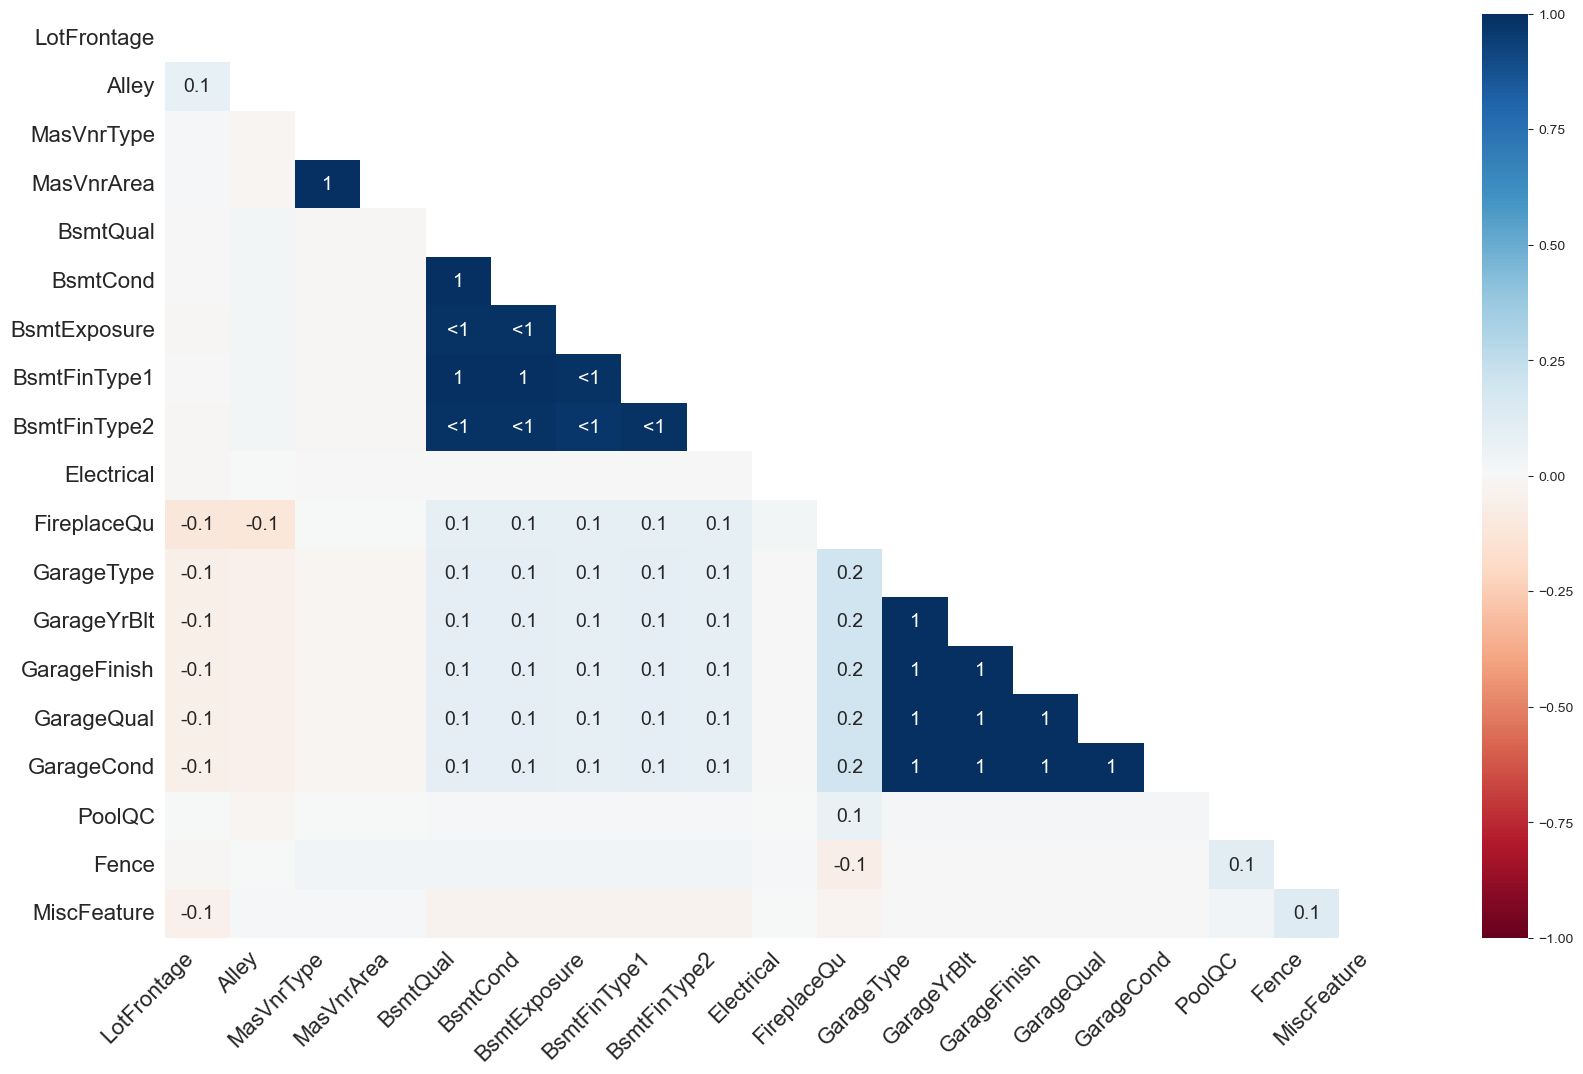

In [8]:
missingno.heatmap(df_train)

In [9]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
mis_col = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]

## Summary Data

In [11]:
df_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

## Check Unique Values

In [12]:
pd.set_option("display.max_rows", None)
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Separate Data into Numerical and Categorical

In [13]:
def classify_variables(data):
    continuous_vars = []
    discrete_vars = []
    nominal_vars = []
    ordinal_vars = []

    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # numerical
            if data[col].nunique() <= 12:  # heuristic: if less than 10 unique values, consider it discrete
                print(f'{col} is likely a discrete numerical variable.')
                discrete_vars.append(col)
            else:
                print(f'{col} is likely a continuous numerical variable.')
                continuous_vars.append(col)
        else:  # categorical
            if pd.api.types.is_categorical_dtype(data[col]):  # if the column type is already categorical
                if hasattr(data[col].cat, 'ordered') and data[col].cat.ordered:  # if it's an ordered category
                    print(f'{col} is likely an ordinal categorical variable.')
                    ordinal_vars.append(col)
                else:
                    print(f'{col} is likely a nominal categorical variable.')
                    nominal_vars.append(col)
            else:  # if it's object or something else
                print(f'{col} is likely a nominal categorical variable.')  # default to nominal, as we can't infer order
                nominal_vars.append(col)
                
    return continuous_vars, discrete_vars, nominal_vars, ordinal_vars

In [14]:
continuous_vars, discrete_vars, nominal_vars, ordinal_vars = classify_variables(df_train)

Id is likely a continuous numerical variable.
MSSubClass is likely a nominal categorical variable.
MSZoning is likely a nominal categorical variable.
LotFrontage is likely a continuous numerical variable.
LotArea is likely a continuous numerical variable.
Street is likely a nominal categorical variable.
Alley is likely a nominal categorical variable.
LotShape is likely a nominal categorical variable.
LandContour is likely a nominal categorical variable.
Utilities is likely a nominal categorical variable.
LotConfig is likely a nominal categorical variable.
LandSlope is likely a nominal categorical variable.
Neighborhood is likely a nominal categorical variable.
Condition1 is likely a nominal categorical variable.
Condition2 is likely a nominal categorical variable.
BldgType is likely a nominal categorical variable.
HouseStyle is likely a nominal categorical variable.
OverallQual is likely a discrete numerical variable.
OverallCond is likely a discrete numerical variable.
YearBuilt is li

In [15]:
#remove customer ID and churn from continous and discrete variabel

continuous_vars.remove("Id")

In [16]:
def len_variable(var, var_name):
    return f"{var_name} has {len(var)} index data"

print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

Continuous Variable has 22 index data
Discrete Variable has 14 index data
Nominal Variable has 44 index data
Ordinal Variable has 0 index data


In [17]:
ordinal_vars = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
 "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", 
 "Fence"]

In [18]:
# ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]

continuous_vars = [i for i in continuous_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
discrete_vars = [i for i in discrete_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train.columns.tolist()]

# discrete_vars.append(["YearBuilt", "YearRemodAdd", "GarageYrBlt"])

print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

Continuous Variable has 22 index data
Discrete Variable has 12 index data
Nominal Variable has 30 index data
Ordinal Variable has 16 index data


In [26]:
numeric_vars = continuous_vars + discrete_vars
categoric_vars = nominal_vars + ordinal_vars

## Check Inconsistent Data

In [19]:
#check incosistent data

for col in nominal_vars:
    print(f"Unique value of {col}:\n{df_train[col].unique()}\n")

Unique value of MSSubClass:
['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']

Unique value of MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique value of Street:
['Pave' 'Grvl']

Unique value of Alley:
[nan 'Grvl' 'Pave']

Unique value of LotShape:
['Reg' 'IR1' 'IR2' 'IR3']

Unique value of LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']

Unique value of Utilities:
['AllPub' 'NoSeWa']

Unique value of LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique value of LandSlope:
['Gtl' 'Mod' 'Sev']

Unique value of Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique value of Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique value of Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Unique

# Exploratory Data Analysis
## Univariate Analysis
### Continuous Features Distribution

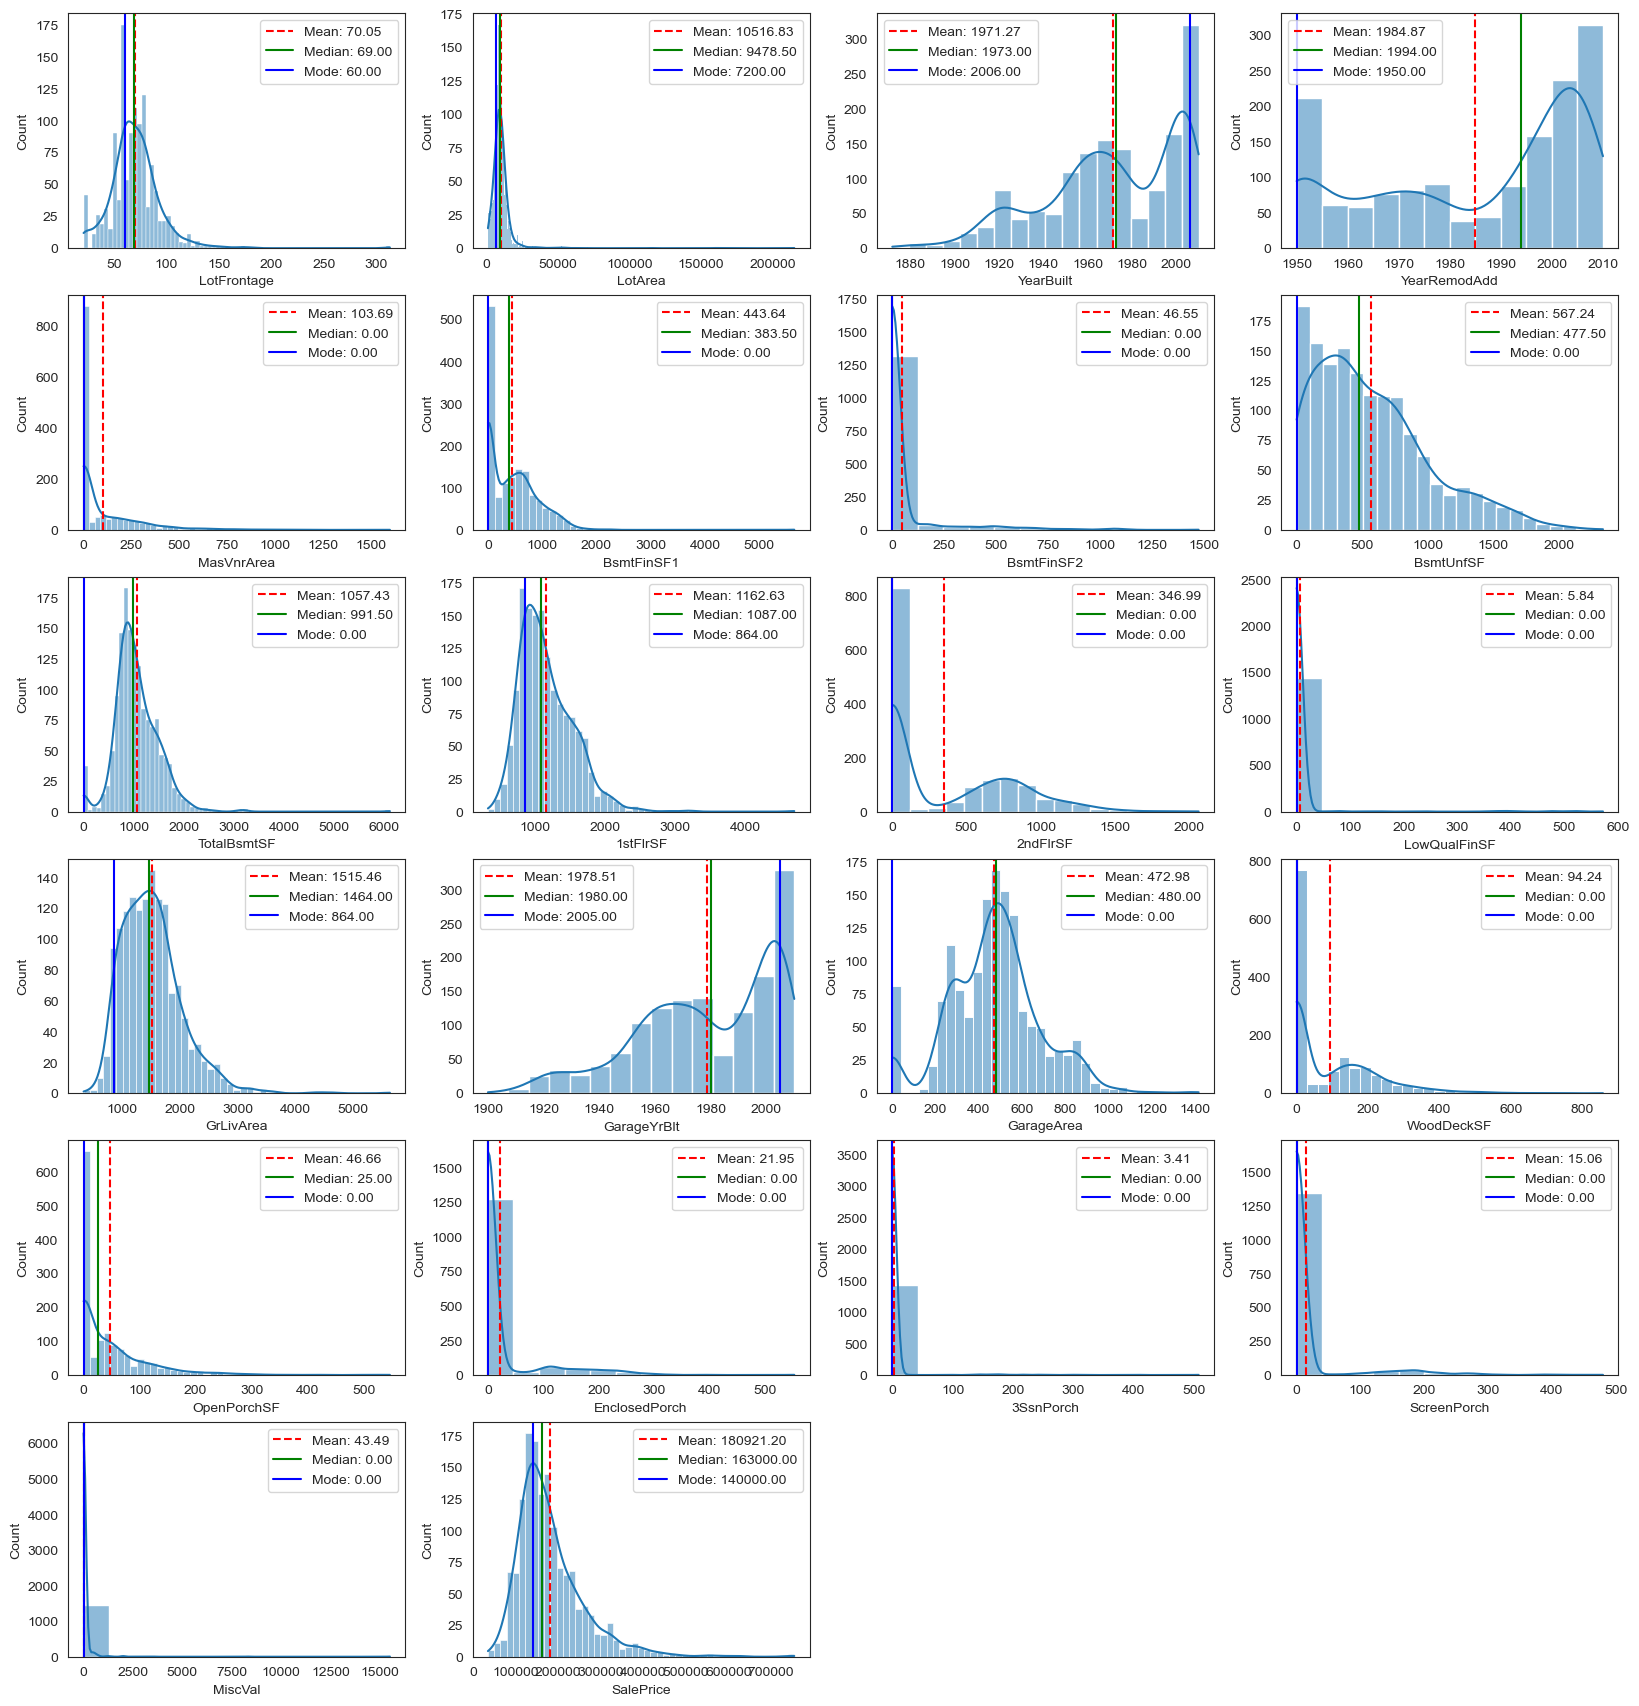

In [20]:
# Get the column names
# continuous_vars = df_train.drop(["ID"], axis=1).continuous_vars

# Set the number of rows and continuous_vars in the subplot grid
nrows = 7
ncols = 4

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(continuous_vars):
    sns.histplot(data=df_train, x=col, ax=axs[i], kde=True)
    
    # Calculate mean, median, mode and standard deviation
    mu = df_train[col].mean()
    median = df_train[col].median()
    mode = df_train[col].mode().get(0, np.nan)
    sigma = df_train[col].std()

    # Add vertical lines for mean, median and mode
    axs[i].axvline(mu, color='r', linestyle='--', label=f'Mean: {mu:.2f}')
    axs[i].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    axs[i].axvline(mode, color='b', linestyle='-', label=f'Mode: {mode:.2f}')
    
    # Add legend
    axs[i].legend()

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

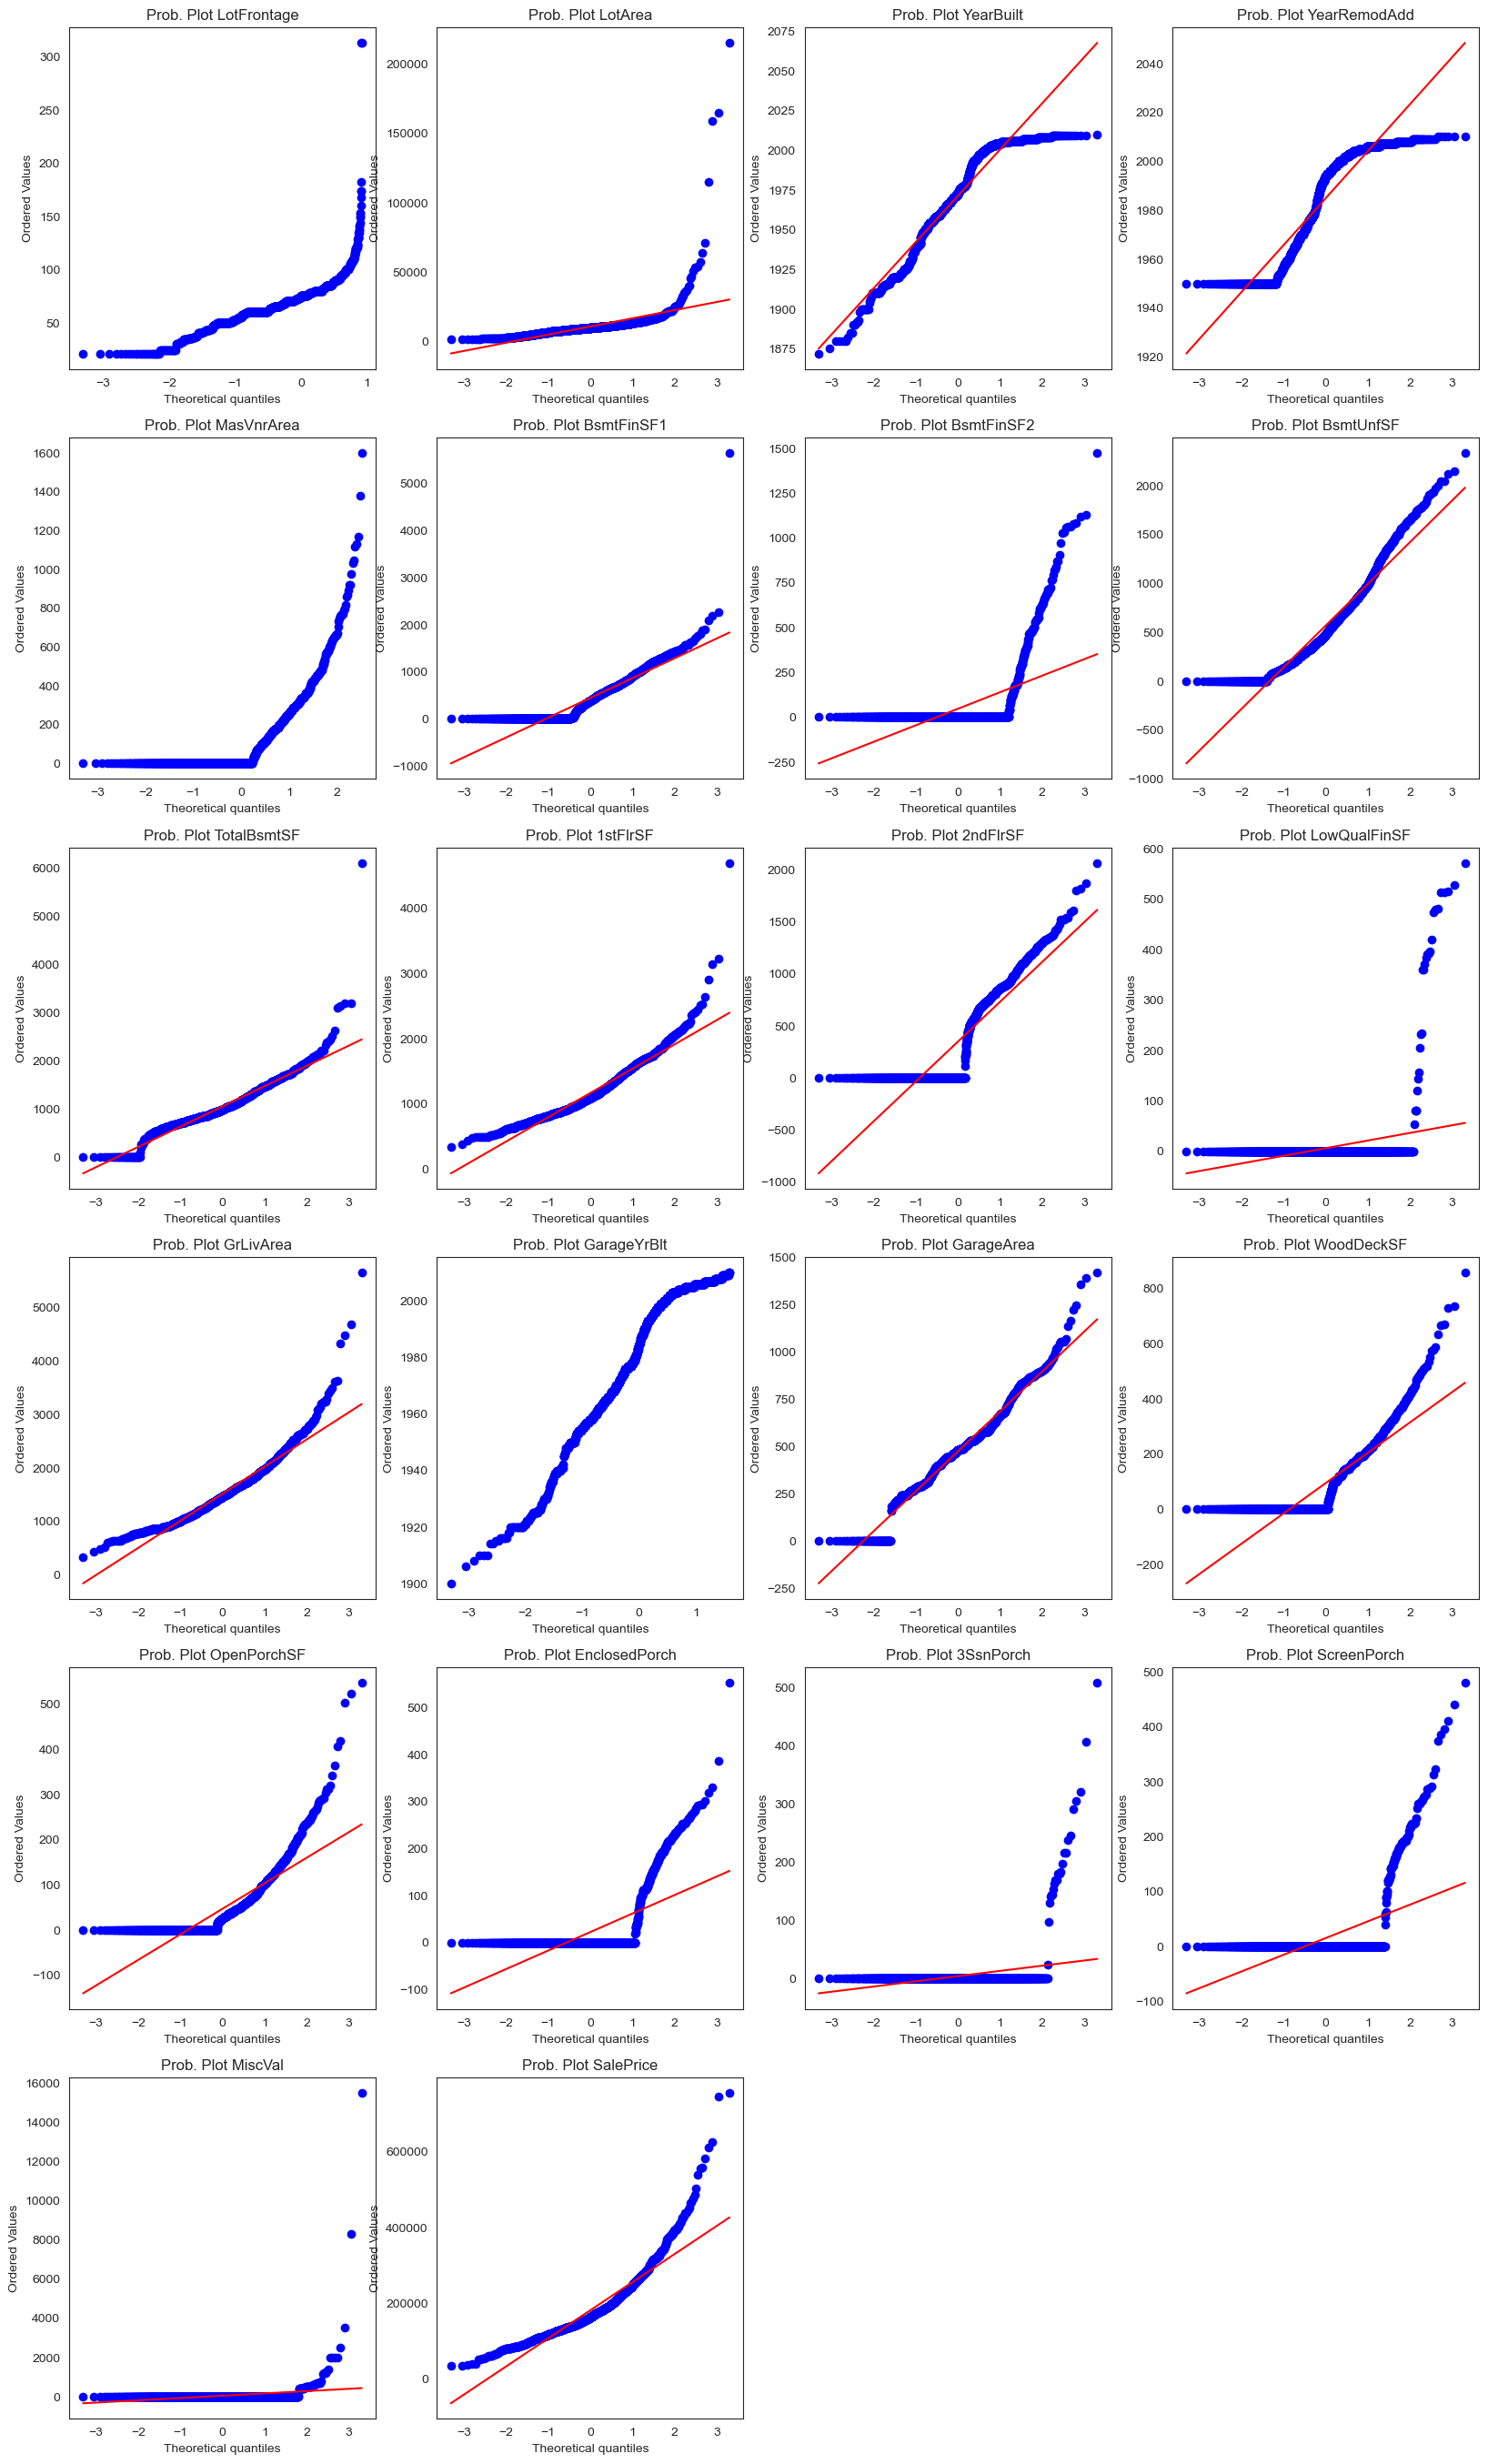

In [21]:
# Get the column names
# continuous_vars = df_train.drop(["ID"], axis=1).continuous_vars

# Set the number of rows and continuous_vars in the subplot grid
nrows = 7
ncols = 4

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 40))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(continuous_vars):
#     sns.histplot(data=df_train, x=col, ax=axs[i], kde=True)
    stats.probplot(df_train[col], plot=axs[i])
    axs[i].set_title(f"Prob. Plot {col}")
    
    # Add legend
#     axs[i].legend()

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Discrete Features Distribution

In [22]:
discrete_vars

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

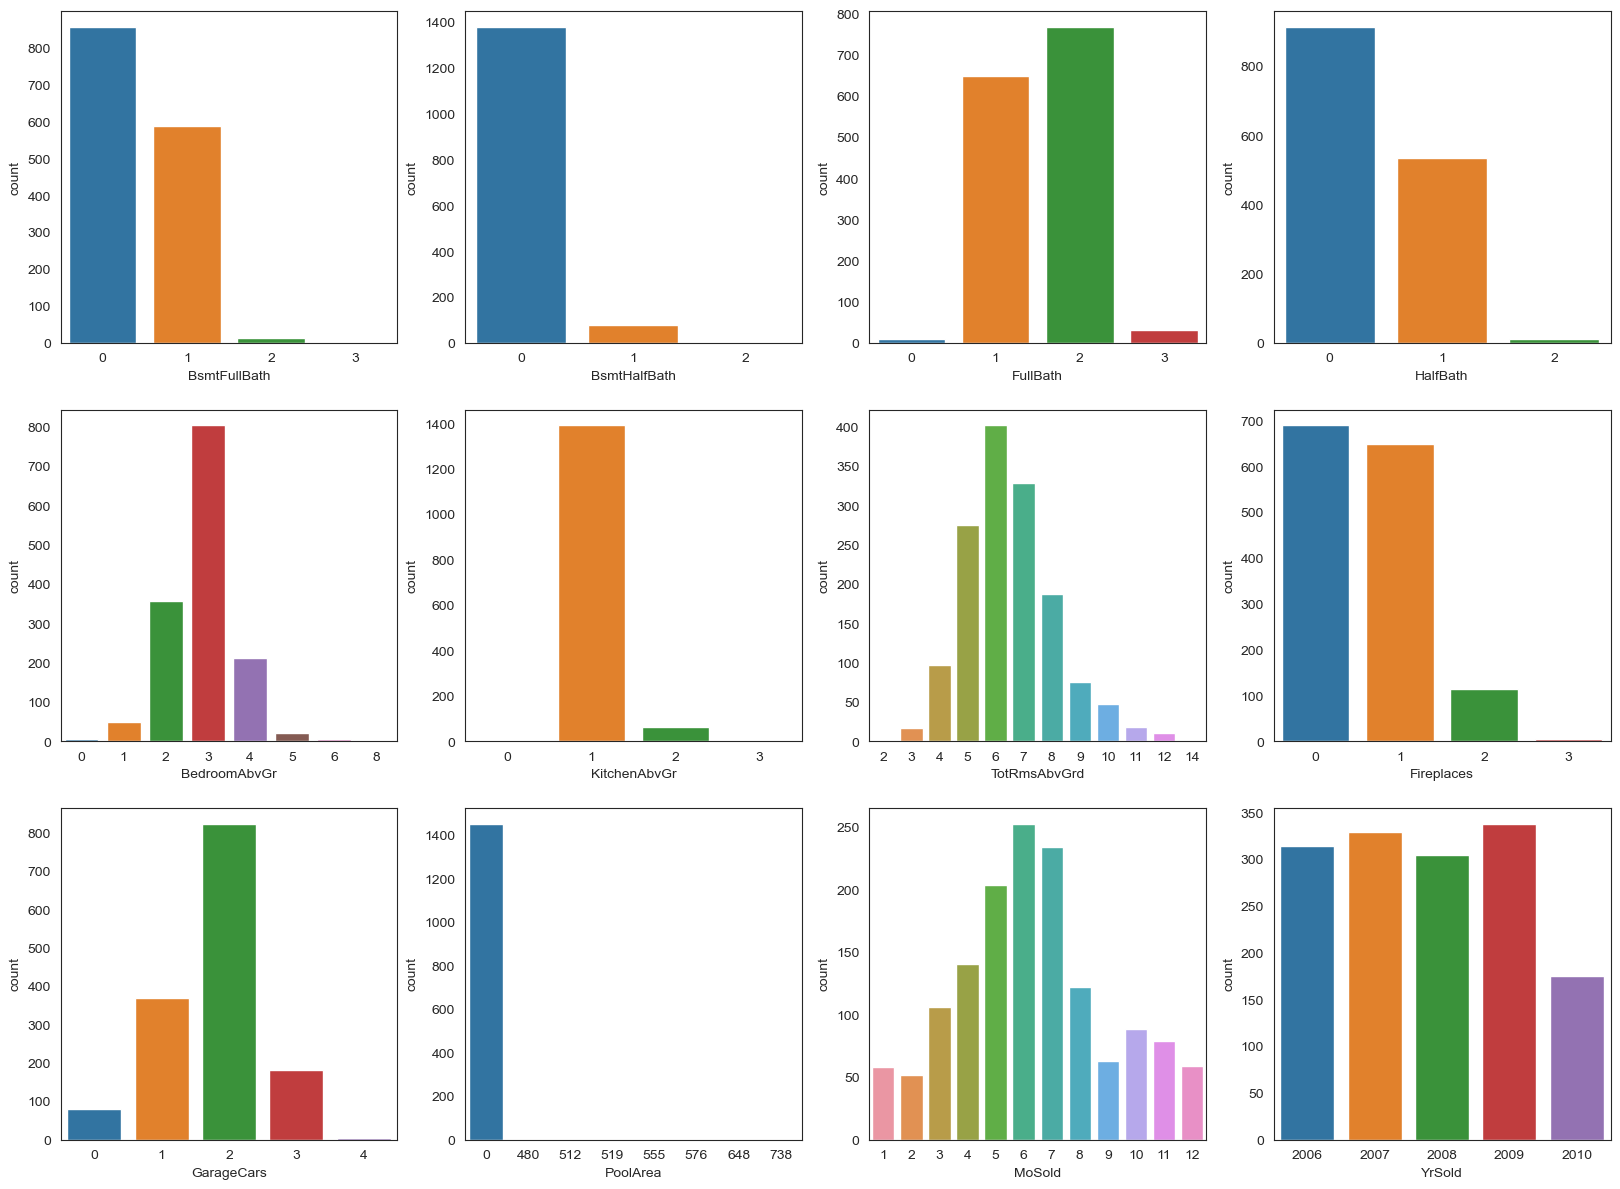

In [23]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 5
ncols = 4

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(discrete_vars):
    sns.countplot(data=df_train, x=col, ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Nominal Features Distribution

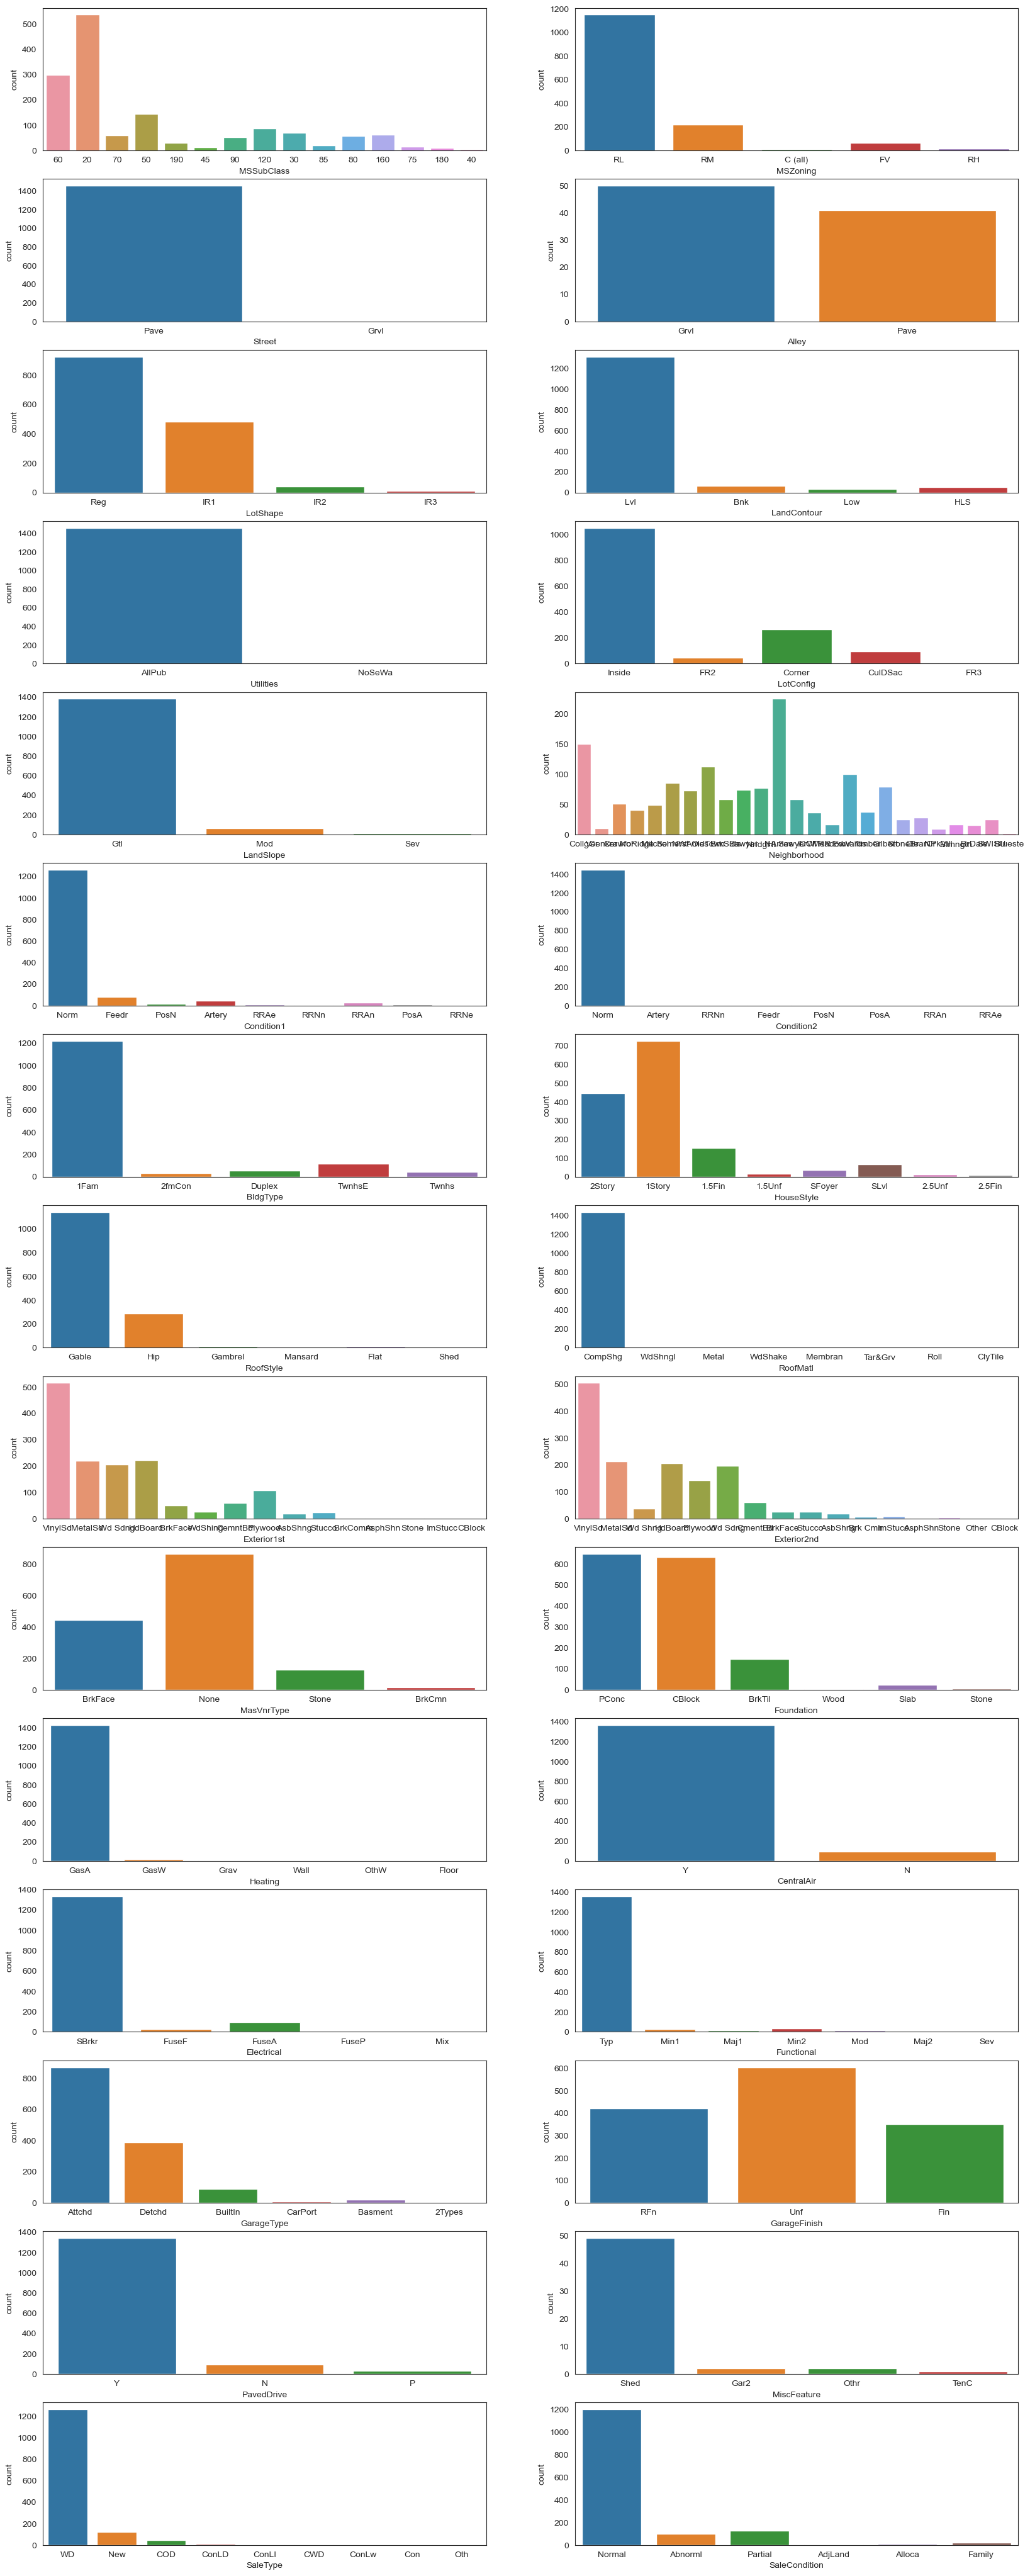

In [24]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 20
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 70))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(nominal_vars):
    sns.countplot(data=df_train, x=col, ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Ordinal Features Distribution

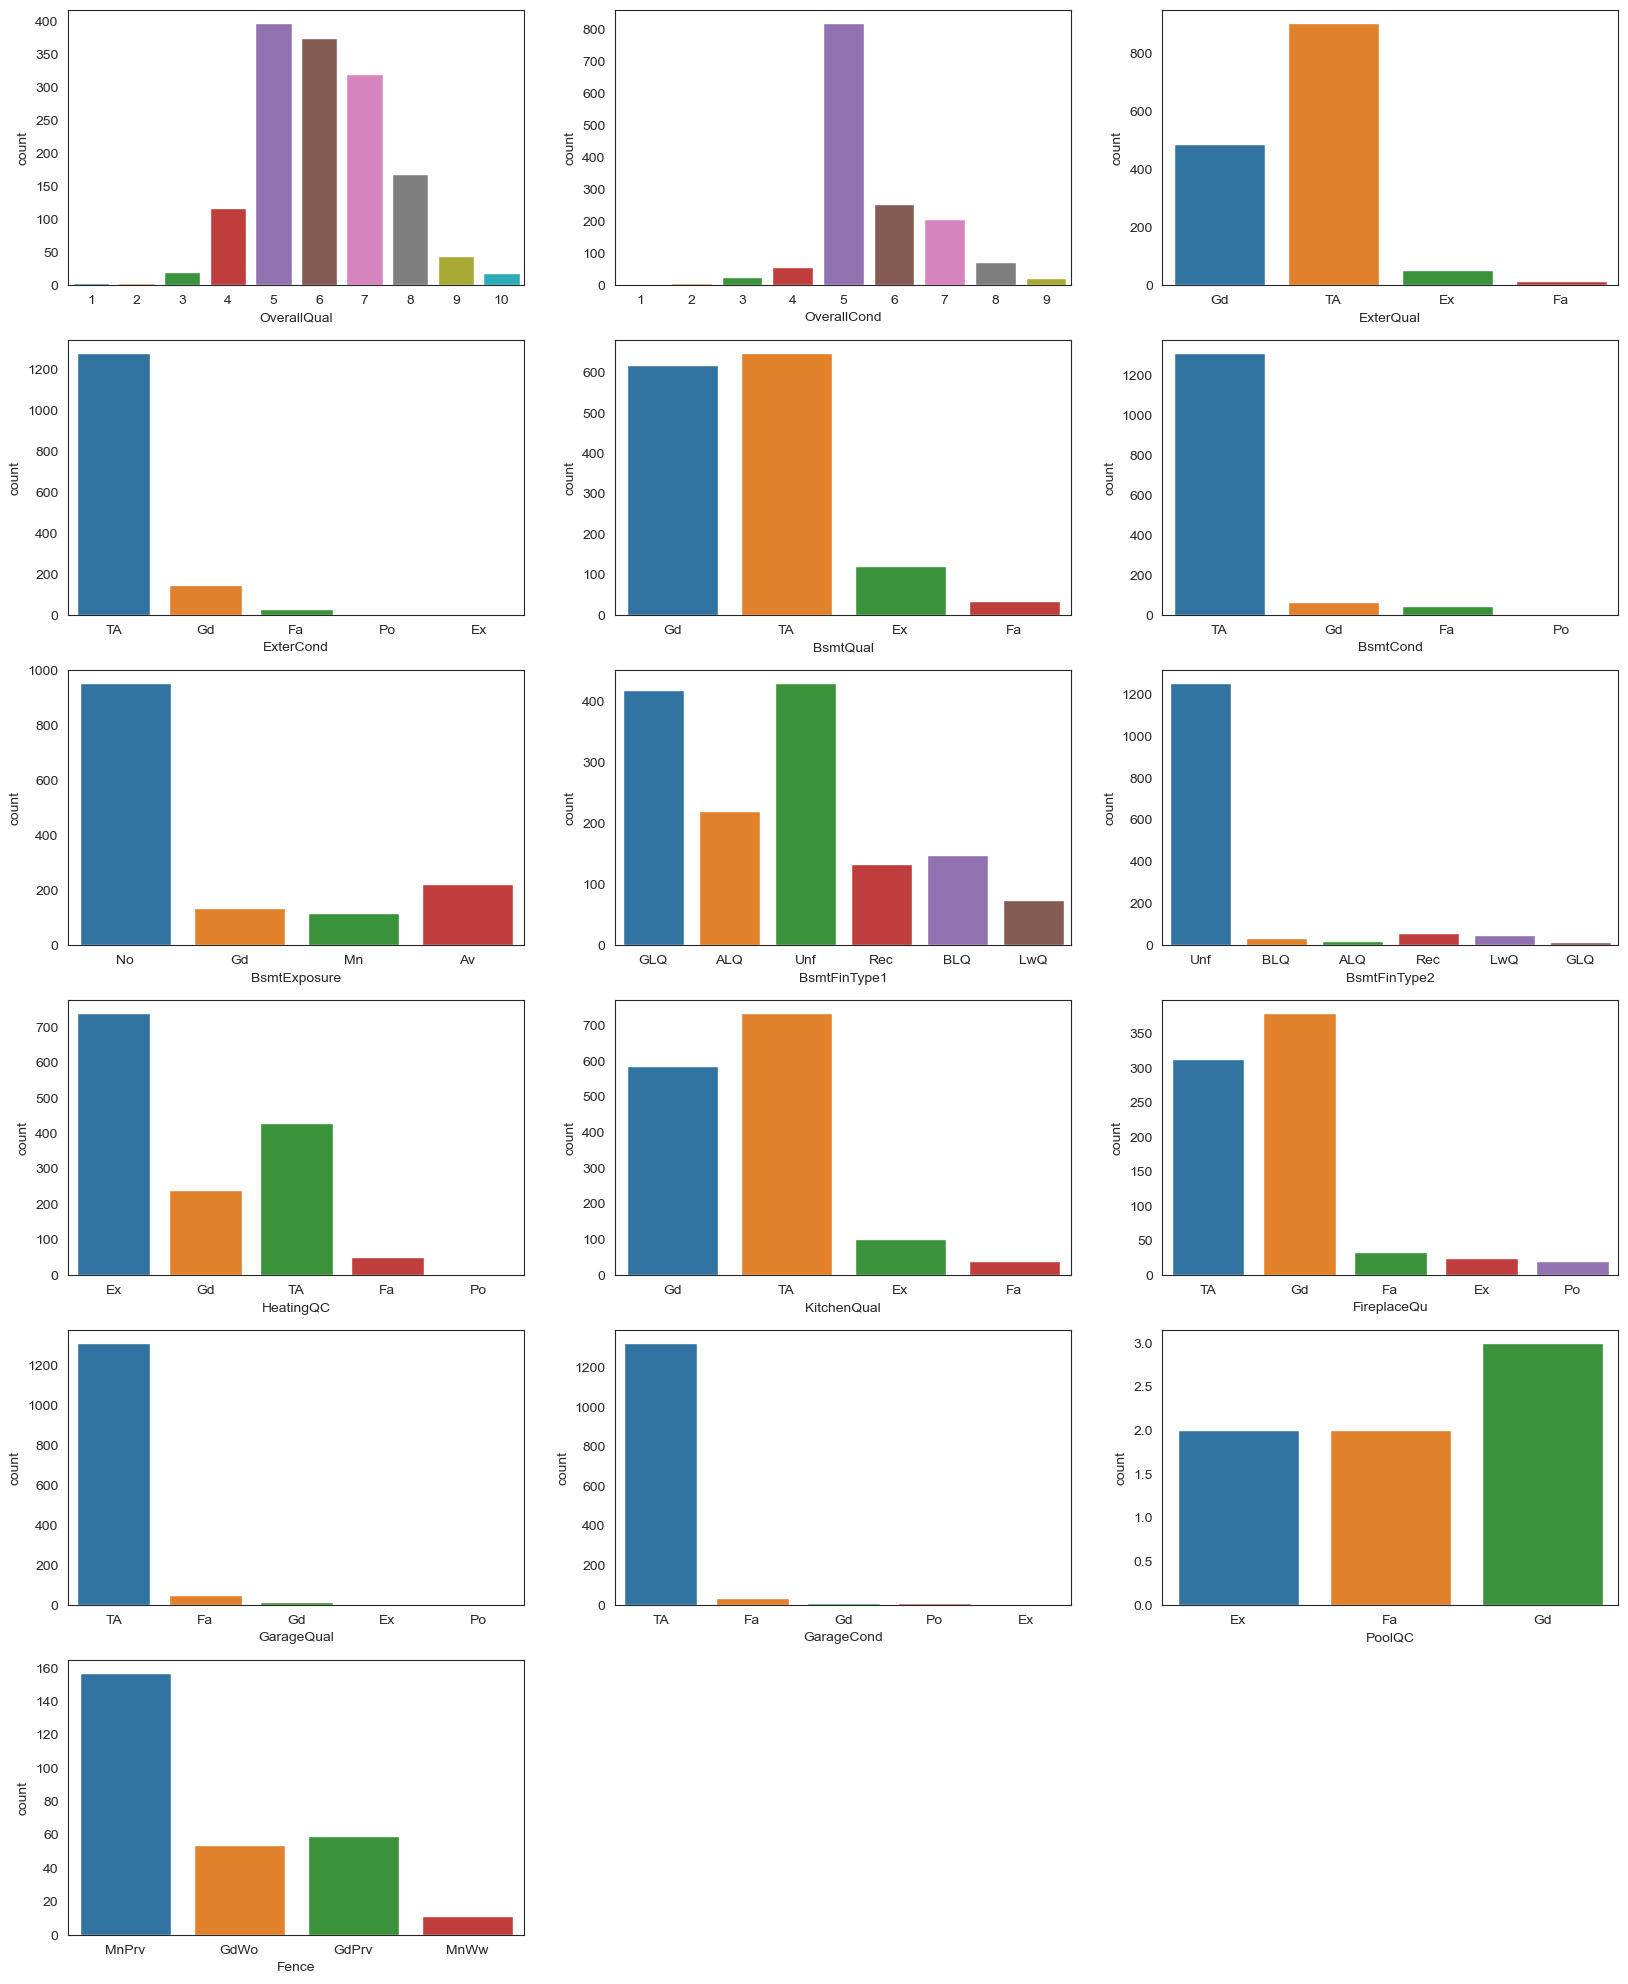

In [30]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 6
ncols = 3

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(ordinal_vars):
    sns.countplot(data=df_train, x=col, ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

## Outlier Detection
### Box Plot

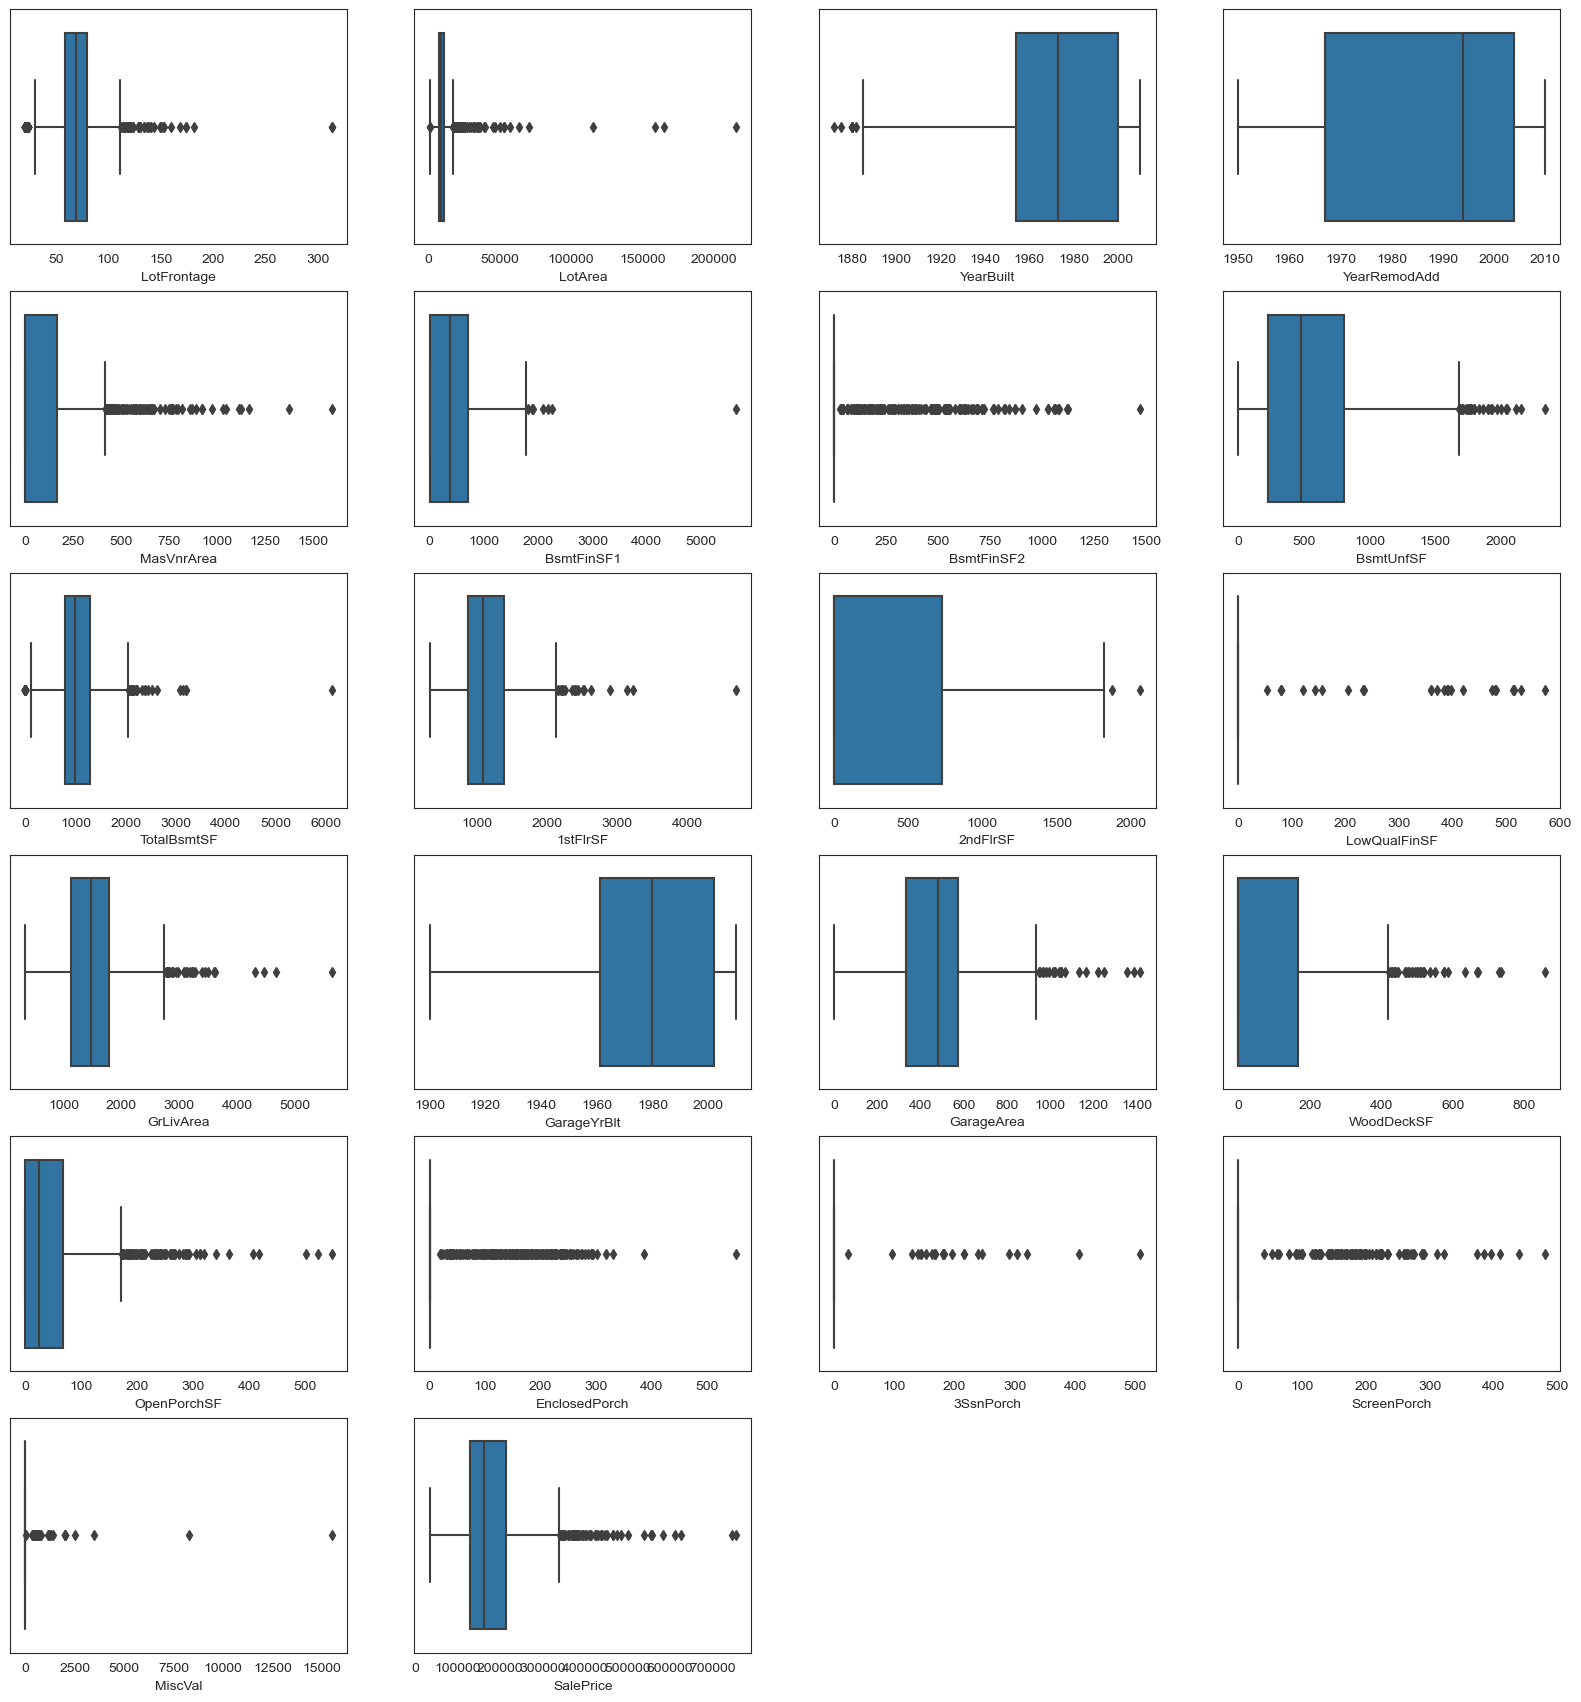

In [31]:
# Set the number of rows and continuous_vars in the subplot grid
nrows = 7
ncols = 4

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(continuous_vars):
    sns.boxplot(data=df_train, x=col, ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### IQR

In [32]:
# check for outliers
for column in continuous_vars:
    q1 = df_train[column].quantile(0.25)
    q3 = df_train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df_train[column][(df_train[column] < lower_bound) | (df_train[column] > upper_bound)].values
    print(f"{column}: {len(df_train[column][(df_train[column] < lower_bound) | (df_train[column] > upper_bound)])} outliers ({lower_bound} as lower bound and {upper_bound} as upper bound)")
    print(f"\n{outliers}\n")

LotFrontage: 88 outliers (27.5 as lower bound and 111.5 as upper bound)

[112. 115.  24.  21. 121. 122.  24. 120. 134. 141.  24.  24. 174.  21.
  21. 174.  21.  21. 120. 129. 140. 120. 118. 116. 150.  21. 130.  21.
  24.  21. 137.  21.  21.  24. 130.  24.  21.  21.  21. 120.  24.  24.
 144. 114.  24.  21. 128. 116. 149.  21. 313.  24.  24.  24. 122. 130.
 121.  21. 115.  21.  21.  21. 120.  24.  24.  24. 114. 168. 182. 134.
  24. 120. 118. 138. 160.  24. 152.  21. 124.  21. 313.  24. 153. 120.
 129. 124.  21.  21.]

LotArea: 69 outliers (1481.5 as lower bound and 17673.5 as upper bound)

[ 50271  19900  21000  21453  19378  31770  22950  25419 159000  19296
  39104  19138  18386 215245 164660  20431  18800  53107  34650  22420
  21750  70761  53227  40094  32668  21872  21780  25095  46589  20896
  18450  21535  26178 115149  21695  53504  21384  28698  45600  17920
  25286  27650  24090  25000   1300  21286   1477  21750  29959  18000
  23257  17755  35760  18030  35133  32463  18890 

## Correlation

### Heatmap Peason Correlation

C:\Users\fahmi\AppData\Local\Temp\ipykernel_20976\1317189649.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

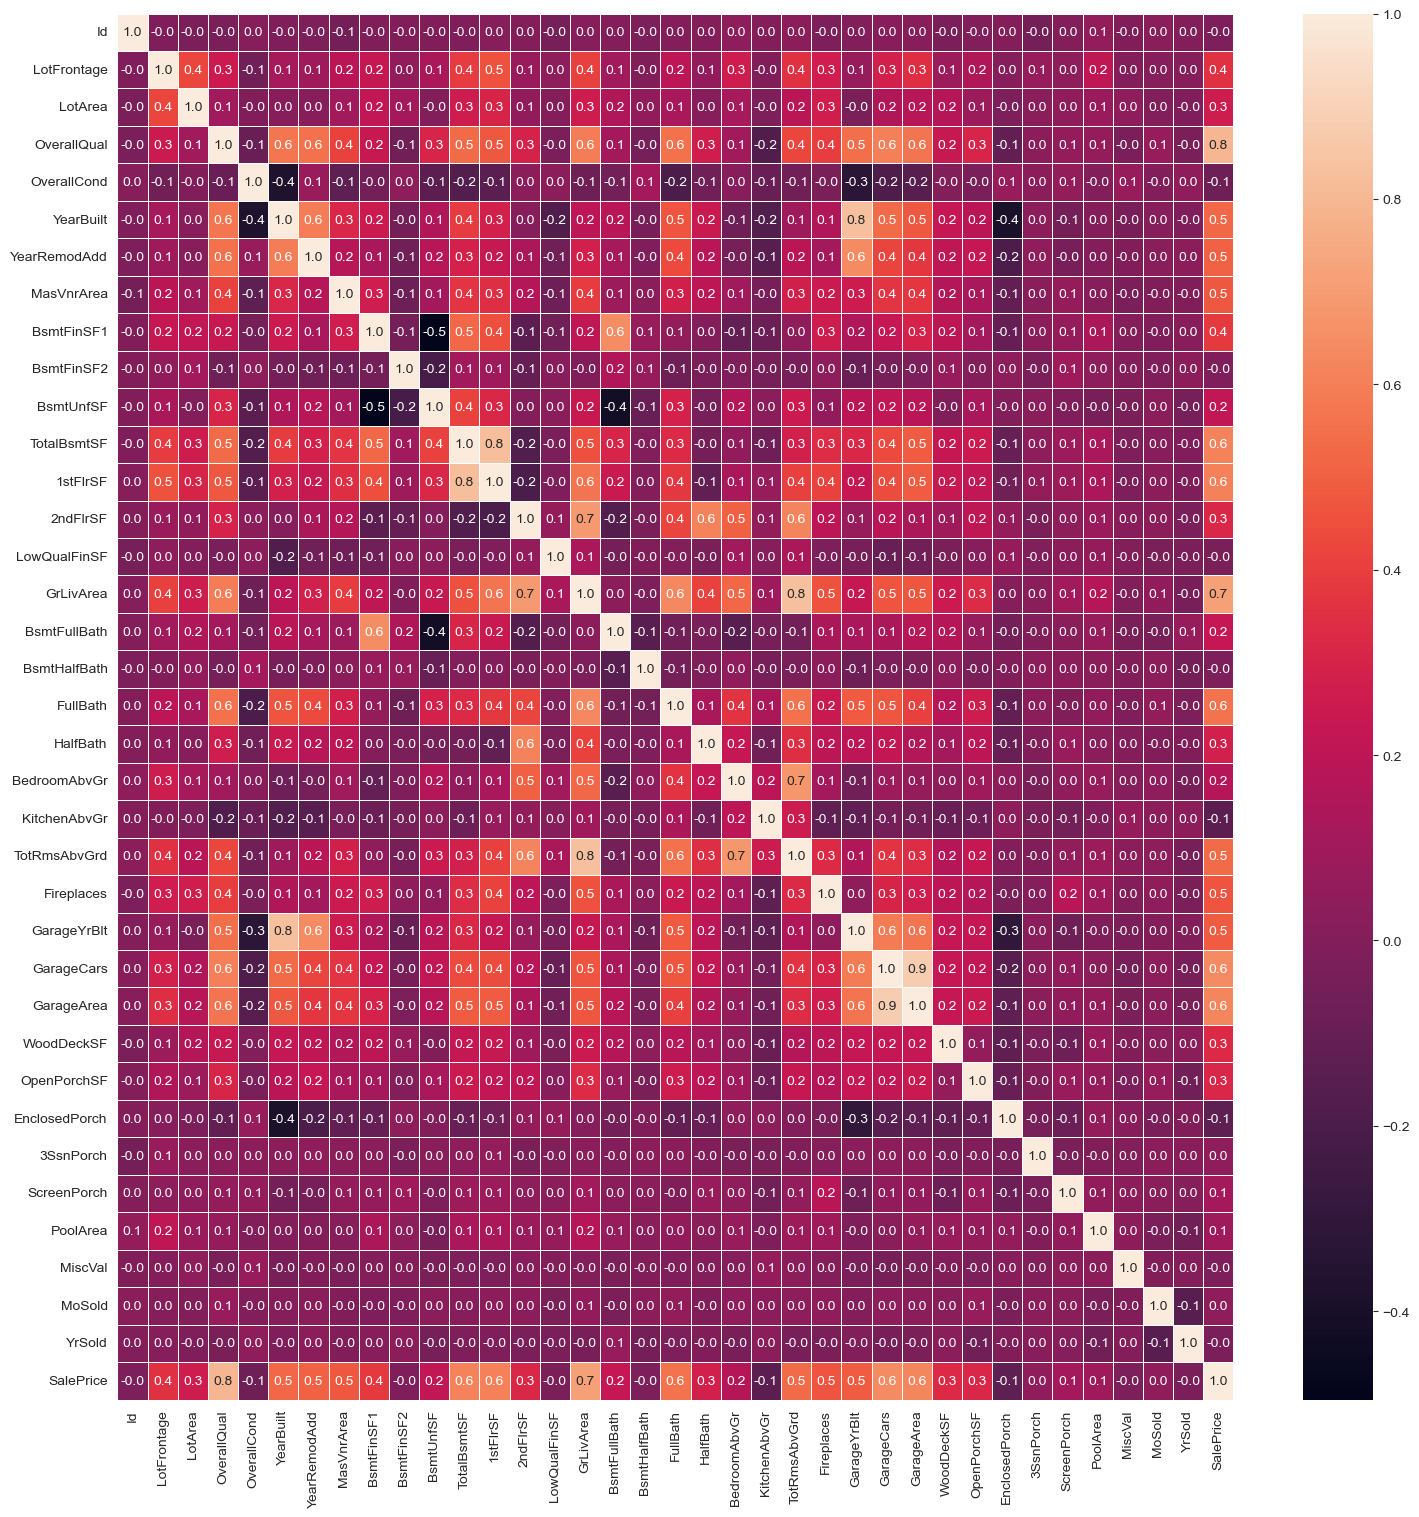

In [33]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [34]:
df_train.corr()["SalePrice"].sort_values(ascending=False)

C:\Users\fahmi\AppData\Local\Temp\ipykernel_20976\3008975183.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Chi-Squared Correlation

In [35]:
def check_categorical_relationship(data, feature1, feature2):
    # Null Hypothesis (H0): There is no relationship between feature1 and feature2
    # Alternative Hypothesis (H1): There is a relationship between feature1 and feature2
    
    # Chi-square Test of Independence
    contingency_table = pd.crosstab(data[feature1], data[feature2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-square Test of Independence between {feature1} and {feature2}:")
    print(f"  - Chi-square Statistic: {chi2}")
    print(f"  - P-value: {p}")
    
    if p < 0.05:
        print(f"  - Decision: Reject H0. There is a statistically significant relationship between {feature1} and {feature2}.")
    else:
        print(f"  - Decision: Fail to reject H0. There is no statistically significant relationship between {feature1} and {feature2}.")

    contingency_table = pd.crosstab(data[feature1], data[feature2])
    if min(contingency_table.shape) > 1:
        chi2 = stats.chi2_contingency(contingency_table)[0]
        cramers_v = np.sqrt(chi2 / (data.shape[0]*(min(contingency_table.shape)-1)))
        print(f"\nCramér's V for {feature2}: {cramers_v}")
        if cramers_v < 0.1:
            print(f"The association between {feature1} and {feature2} is very weak.")
            return cramers_v
        elif cramers_v < 0.3:
            print(f"The association between {feature1} and {feature2} is weak.")
            return cramers_v
        elif cramers_v < 0.5:
            print(f"The association between {feature1} and {feature2} is moderate.")
            return cramers_v
        else:
            print(f"The association between {feature1} and {feature2} is strong.")
            return cramers_v
    else:
        print(f"Insufficient categories in {feature1} or {feature2} to calculate Cramér's V.")
        return None
        
    print("*"*100)

In [36]:
corr_values = []

# Iterate over the columns of the DataFrame (excluding "diagnosis")
for col in nominal_vars:
    value = check_categorical_relationship(df_train, "SalePrice", col)
    corr_values.append({"columns": col, "value": value})


Chi-square Test of Independence between SalePrice and MSSubClass:
  - Chi-square Statistic: 8937.776489938498
  - P-value: 0.9928572389696766
  - Decision: Fail to reject H0. There is no statistically significant relationship between SalePrice and MSSubClass.

Cramér's V for MSSubClass: 0.6612631159453182
The association between SalePrice and MSSubClass is strong.

Chi-square Test of Independence between SalePrice and MSZoning:
  - Chi-square Statistic: 3147.8911158183746
  - P-value: 4.348325060681923e-11
  - Decision: Reject H0. There is a statistically significant relationship between SalePrice and MSZoning.

Cramér's V for MSZoning: 0.7341814839253049
The association between SalePrice and MSZoning is strong.

Chi-square Test of Independence between SalePrice and Street:
  - Chi-square Statistic: 888.3129945096932
  - P-value: 8.338870380463891e-09
  - Decision: Reject H0. There is a statistically significant relationship between SalePrice and Street.

Cramér's V for Street: 0.7800


Chi-square Test of Independence between SalePrice and GarageType:
  - Chi-square Statistic: 3284.261536628452
  - P-value: 0.13248306385029038
  - Decision: Fail to reject H0. There is no statistically significant relationship between SalePrice and GarageType.

Cramér's V for GarageType: 0.6707449892724019
The association between SalePrice and GarageType is strong.

Chi-square Test of Independence between SalePrice and GarageFinish:
  - Chi-square Statistic: 1604.5787796542827
  - P-value: 1.035588693092293e-09
  - Decision: Reject H0. There is a statistically significant relationship between SalePrice and GarageFinish.

Cramér's V for GarageFinish: 0.7412916299969409
The association between SalePrice and GarageFinish is strong.

Chi-square Test of Independence between SalePrice and PavedDrive:
  - Chi-square Statistic: 1204.7748663699863
  - P-value: 0.9912799626956016
  - Decision: Fail to reject H0. There is no statistically significant relationship between SalePrice and PavedDrive

In [37]:
pd.DataFrame(corr_values).sort_values("value", ascending=False)

columns     value
2          Street  0.780022
20        Heating  0.758639
21     CentralAir  0.752556
4        LotShape  0.747329
25   GarageFinish  0.741292
29  SaleCondition  0.735661
1        MSZoning  0.734181
28       SaleType  0.722664
18     MasVnrType  0.721613
19     Foundation  0.708963
9    Neighborhood  0.694457
8       LandSlope  0.689661
7       LotConfig  0.688952
22     Electrical  0.688067
5     LandContour  0.687849
11     Condition2  0.683365
24     GarageType  0.670745
13     HouseStyle  0.670659
17    Exterior2nd  0.668462
0      MSSubClass  0.661263
16    Exterior1st  0.652885
26     PavedDrive  0.642335
12       BldgType  0.634891
14      RoofStyle  0.604286
10     Condition1  0.595906
23     Functional  0.592372
15       RoofMatl  0.554863
6       Utilities  0.407548
3           Alley  0.249657
27    MiscFeature  0.192318

## Check Correlated Features to Handle Missing Values

In [38]:
mis_col_numeric = [i for i in mis_col if i not in ordinal_vars and i not in nominal_vars]
mis_col_categorical = [i for i in mis_col if i not in mis_col_numeric]

In [39]:
mis_col_numeric

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [40]:
mis_col_categorical

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Numerical Missing Values
#### LotFrontage

In [41]:
corr_values = []

# Iterate over the columns of the DataFrame (excluding "diagnosis")
for col in nominal_vars:
    value = check_categorical_relationship(df_train, "LotFrontage", col)
    corr_values.append({"columns": col, "value": value})


Chi-square Test of Independence between LotFrontage and MSSubClass:
  - Chi-square Statistic: 3053.856232312672
  - P-value: 1.8859920250122883e-104
  - Decision: Reject H0. There is a statistically significant relationship between LotFrontage and MSSubClass.

Cramér's V for MSSubClass: 0.3865305708570512
The association between LotFrontage and MSSubClass is moderate.

Chi-square Test of Independence between LotFrontage and MSZoning:
  - Chi-square Statistic: 846.8203065641515
  - P-value: 1.2445768084105177e-28
  - Decision: Reject H0. There is a statistically significant relationship between LotFrontage and MSZoning.

Cramér's V for MSZoning: 0.3807932209892868
The association between LotFrontage and MSZoning is moderate.

Chi-square Test of Independence between LotFrontage and Street:
  - Chi-square Statistic: 130.1501616080335
  - P-value: 0.0817259730785686
  - Decision: Fail to reject H0. There is no statistically significant relationship between LotFrontage and Street.

Cramér'


Cramér's V for GarageType: 0.37372688915366387
The association between LotFrontage and GarageType is moderate.

Chi-square Test of Independence between LotFrontage and GarageFinish:
  - Chi-square Statistic: 469.35810052984806
  - P-value: 1.5884549477435675e-21
  - Decision: Reject H0. There is a statistically significant relationship between LotFrontage and GarageFinish.

Cramér's V for GarageFinish: 0.4009227800012373
The association between LotFrontage and GarageFinish is moderate.

Chi-square Test of Independence between LotFrontage and PavedDrive:
  - Chi-square Statistic: 323.82319339306264
  - P-value: 4.2245455100376626e-06
  - Decision: Reject H0. There is a statistically significant relationship between LotFrontage and PavedDrive.

Cramér's V for PavedDrive: 0.3330140446013258
The association between LotFrontage and PavedDrive is moderate.

Chi-square Test of Independence between LotFrontage and MiscFeature:
  - Chi-square Statistic: 13.827976190476193
  - P-value: 0.999962

In [42]:
df_corr_LotFrontage = pd.DataFrame(corr_values).sort_values("value", ascending=False)
df_corr_LotFrontage[~(df_corr_LotFrontage["columns"].isin(mis_col))][:5]

columns     value
12      BldgType  0.520909
4       LotShape  0.519797
19    Foundation  0.423462
9   Neighborhood  0.417497
15      RoofMatl  0.388544

#### MasVnrArea

In [43]:
corr_values = []

# Iterate over the columns of the DataFrame (excluding "diagnosis")
for col in nominal_vars:
    value = check_categorical_relationship(df_train, "MasVnrArea", col)
    corr_values.append({"columns": col, "value": value})


Chi-square Test of Independence between MasVnrArea and MSSubClass:
  - Chi-square Statistic: 3231.0091697486287
  - P-value: 1.0
  - Decision: Fail to reject H0. There is no statistically significant relationship between MasVnrArea and MSSubClass.

Cramér's V for MSSubClass: 0.3975837718806551
The association between MasVnrArea and MSSubClass is moderate.

Chi-square Test of Independence between MasVnrArea and MSZoning:
  - Chi-square Statistic: 735.8833306378967
  - P-value: 1.0
  - Decision: Fail to reject H0. There is no statistically significant relationship between MasVnrArea and MSZoning.

Cramér's V for MSZoning: 0.3549752380515814
The association between MasVnrArea and MSZoning is moderate.

Chi-square Test of Independence between MasVnrArea and Street:
  - Chi-square Statistic: 160.49362653673958
  - P-value: 0.9999999999999997
  - Decision: Fail to reject H0. There is no statistically significant relationship between MasVnrArea and Street.

Cramér's V for Street: 0.331552622


Cramér's V for GarageType: 0.4609266798238176
The association between MasVnrArea and GarageType is moderate.

Chi-square Test of Independence between MasVnrArea and GarageFinish:
  - Chi-square Statistic: 886.1619252226183
  - P-value: 2.358901408429608e-09
  - Decision: Reject H0. There is a statistically significant relationship between MasVnrArea and GarageFinish.

Cramér's V for GarageFinish: 0.5508902897833733
The association between MasVnrArea and GarageFinish is strong.

Chi-square Test of Independence between MasVnrArea and PavedDrive:
  - Chi-square Statistic: 201.79271703759508
  - P-value: 1.0
  - Decision: Fail to reject H0. There is no statistically significant relationship between MasVnrArea and PavedDrive.

Cramér's V for PavedDrive: 0.26288228330545355
The association between MasVnrArea and PavedDrive is weak.

Chi-square Test of Independence between MasVnrArea and MiscFeature:
  - Chi-square Statistic: 81.40973312401886
  - P-value: 0.0007208561780668505
  - Decision:

In [44]:
df_corr_MasVnrArea = pd.DataFrame(corr_values).sort_values("value", ascending=False)
df_corr_MasVnrArea[~(df_corr_MasVnrArea["columns"].isin(mis_col))][:5]

columns     value
6    Utilities  0.997257
15    RoofMatl  0.621725
7    LotConfig  0.577342
11  Condition2  0.533658
12    BldgType  0.510206

In [45]:
corr_values = []

# Iterate over the columns of the DataFrame (excluding "diagnosis")
for col in nominal_vars:
    value = check_categorical_relationship(df_train, "BldgType", col)
    corr_values.append({"columns": col, "value": value})


Chi-square Test of Independence between BldgType and MSSubClass:
  - Chi-square Statistic: 4683.575445830253
  - P-value: 0.0
  - Decision: Reject H0. There is a statistically significant relationship between BldgType and MSSubClass.

Cramér's V for MSSubClass: 0.8955345313770664
The association between BldgType and MSSubClass is strong.

Chi-square Test of Independence between BldgType and MSZoning:
  - Chi-square Statistic: 222.95209456537017
  - P-value: 1.7470289640148326e-38
  - Decision: Reject H0. There is a statistically significant relationship between BldgType and MSZoning.

Cramér's V for MSZoning: 0.1953886601660073
The association between BldgType and MSZoning is weak.

Chi-square Test of Independence between BldgType and Street:
  - Chi-square Statistic: 22.45477293954588
  - P-value: 0.00016268280392998374
  - Decision: Reject H0. There is a statistically significant relationship between BldgType and Street.

Cramér's V for Street: 0.12401605325699727
The association be


Chi-square Test of Independence between BldgType and MiscFeature:
  - Chi-square Statistic: 20.314660558100794
  - P-value: 0.002433844653520306
  - Decision: Reject H0. There is a statistically significant relationship between BldgType and MiscFeature.

Cramér's V for MiscFeature: 0.08340908543795551
The association between BldgType and MiscFeature is very weak.

Chi-square Test of Independence between BldgType and SaleType:
  - Chi-square Statistic: 88.22322643535189
  - P-value: 3.6974200778785314e-07
  - Decision: Reject H0. There is a statistically significant relationship between BldgType and SaleType.

Cramér's V for SaleType: 0.12290938473269027
The association between BldgType and SaleType is weak.

Chi-square Test of Independence between BldgType and SaleCondition:
  - Chi-square Statistic: 156.64332739972485
  - P-value: 3.332216625027881e-23
  - Decision: Reject H0. There is a statistically significant relationship between BldgType and SaleCondition.

Cramér's V for SaleCo

In [46]:
pd.DataFrame(corr_values).sort_values("value", ascending=False)

columns     value
12       BldgType  1.000000
0      MSSubClass  0.895535
9    Neighborhood  0.437404
21     CentralAir  0.293211
17    Exterior2nd  0.212241
19     Foundation  0.197064
1        MSZoning  0.195389
16    Exterior1st  0.189718
25   GarageFinish  0.186728
13     HouseStyle  0.170806
29  SaleCondition  0.163776
24     GarageType  0.163300
11     Condition2  0.159550
26     PavedDrive  0.156099
3           Alley  0.144467
2          Street  0.124016
28       SaleType  0.122909
20        Heating  0.122029
10     Condition1  0.105972
18     MasVnrType  0.103433
4        LotShape  0.099326
22     Electrical  0.096041
5     LandContour  0.086507
7       LotConfig  0.086340
23     Functional  0.084216
27    MiscFeature  0.083409
14      RoofStyle  0.075488
15       RoofMatl  0.074427
8       LandSlope  0.058608
6       Utilities  0.011612

#### mszoning

In [52]:
corr_values = []

# Iterate over the columns of the DataFrame (excluding "diagnosis")
for col in nominal_vars:
    value = check_categorical_relationship(df_train, "MSZoning", col)
    corr_values.append({"columns": col, "value": value})


Chi-square Test of Independence between MSZoning and MSSubClass:
  - Chi-square Statistic: 718.6314037798861
  - P-value: 8.82811048712337e-116
  - Decision: Reject H0. There is a statistically significant relationship between MSZoning and MSSubClass.

Cramér's V for MSSubClass: 0.3507895702056277
The association between MSZoning and MSSubClass is moderate.

Chi-square Test of Independence between MSZoning and MSZoning:
  - Chi-square Statistic: 5840.000000000001
  - P-value: 0.0
  - Decision: Reject H0. There is a statistically significant relationship between MSZoning and MSZoning.

Cramér's V for MSZoning: 1.0
The association between MSZoning and MSZoning is strong.

Chi-square Test of Independence between MSZoning and Street:
  - Chi-square Statistic: 94.74158356813642
  - P-value: 1.293331100878627e-19
  - Decision: Reject H0. There is a statistically significant relationship between MSZoning and Street.

Cramér's V for Street: 0.25473809215469523
The association between MSZoning


Cramér's V for MiscFeature: 0.03256295226876221
The association between MSZoning and MiscFeature is very weak.

Chi-square Test of Independence between MSZoning and SaleType:
  - Chi-square Statistic: 164.64357237677825
  - P-value: 8.918626304782042e-20
  - Decision: Reject H0. There is a statistically significant relationship between MSZoning and SaleType.

Cramér's V for SaleType: 0.16790590379814002
The association between MSZoning and SaleType is weak.

Chi-square Test of Independence between MSZoning and SaleCondition:
  - Chi-square Statistic: 127.83725428196675
  - P-value: 9.909275301032864e-18
  - Decision: Reject H0. There is a statistically significant relationship between MSZoning and SaleCondition.

Cramér's V for SaleCondition: 0.14795249508442443
The association between MSZoning and SaleCondition is weak.


In [53]:
df_corr_MSZoning = pd.DataFrame(corr_values).sort_values("value", ascending=False)
df_corr_MSZoning[~(df_corr_MSZoning["columns"].isin(mis_col))][:5]

columns     value
1       MSZoning  1.000000
9   Neighborhood  0.652480
0     MSSubClass  0.350790
21    CentralAir  0.301087
2         Street  0.254738

In [54]:
numeric_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

## Bivariate Analysis

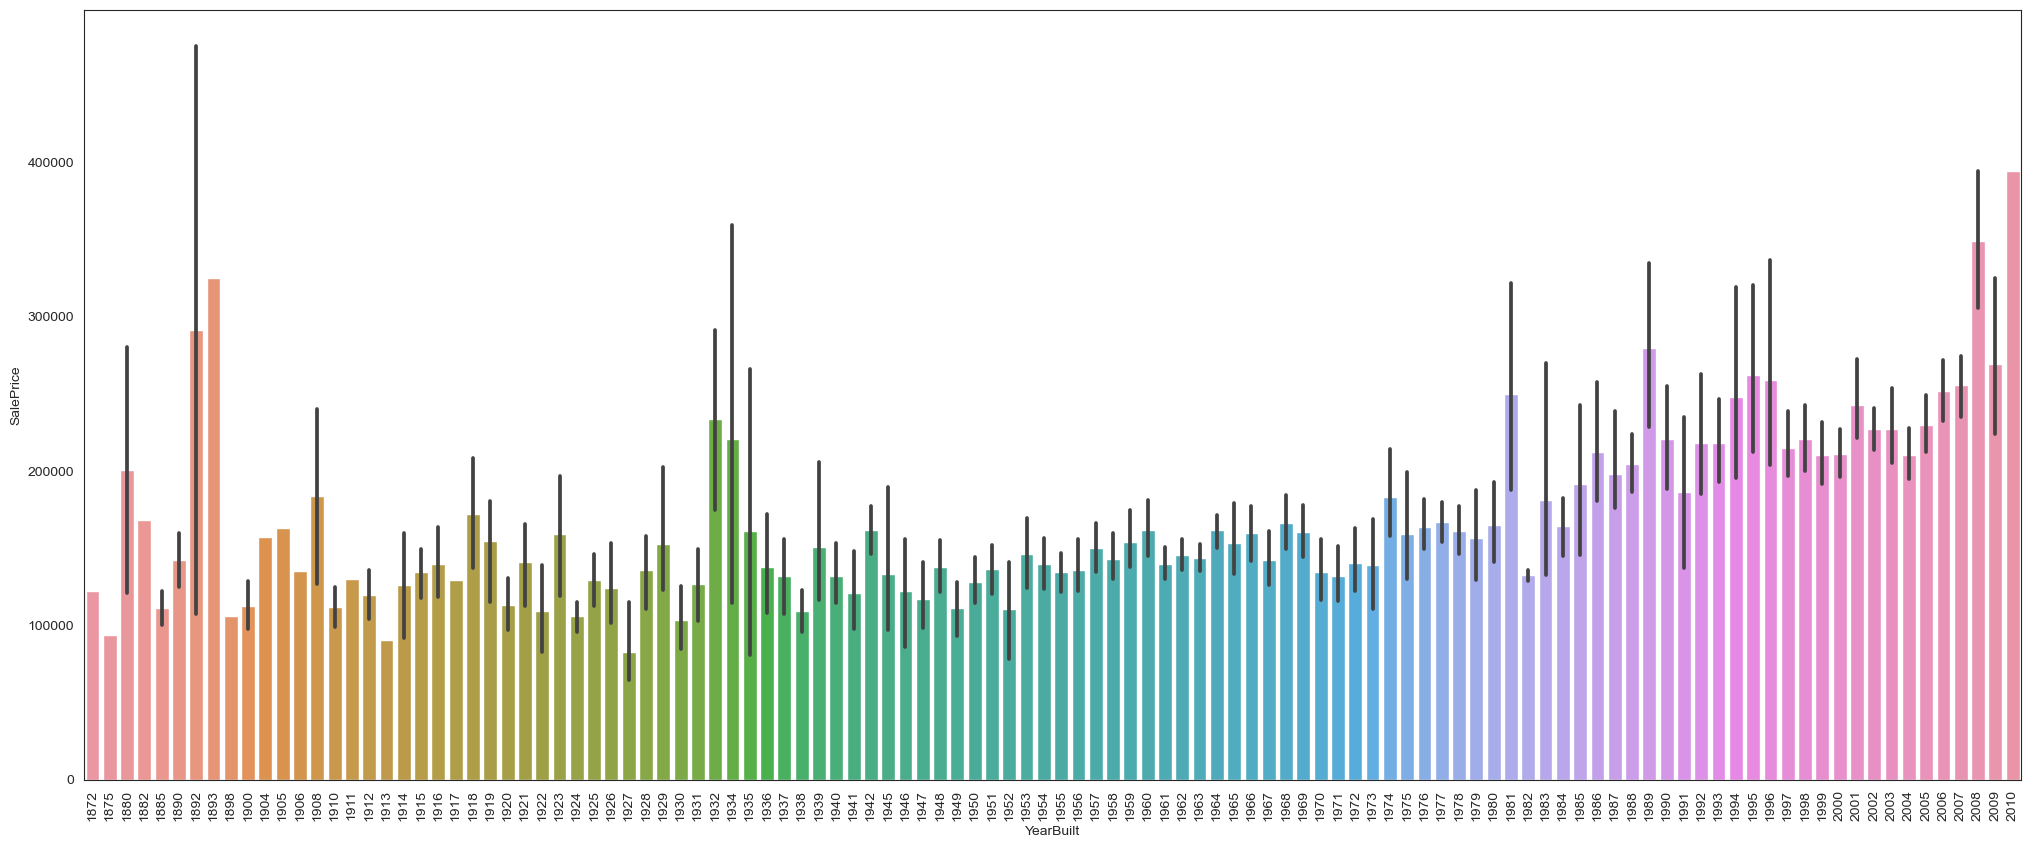

In [55]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=df_train, x="YearBuilt", y="SalePrice")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

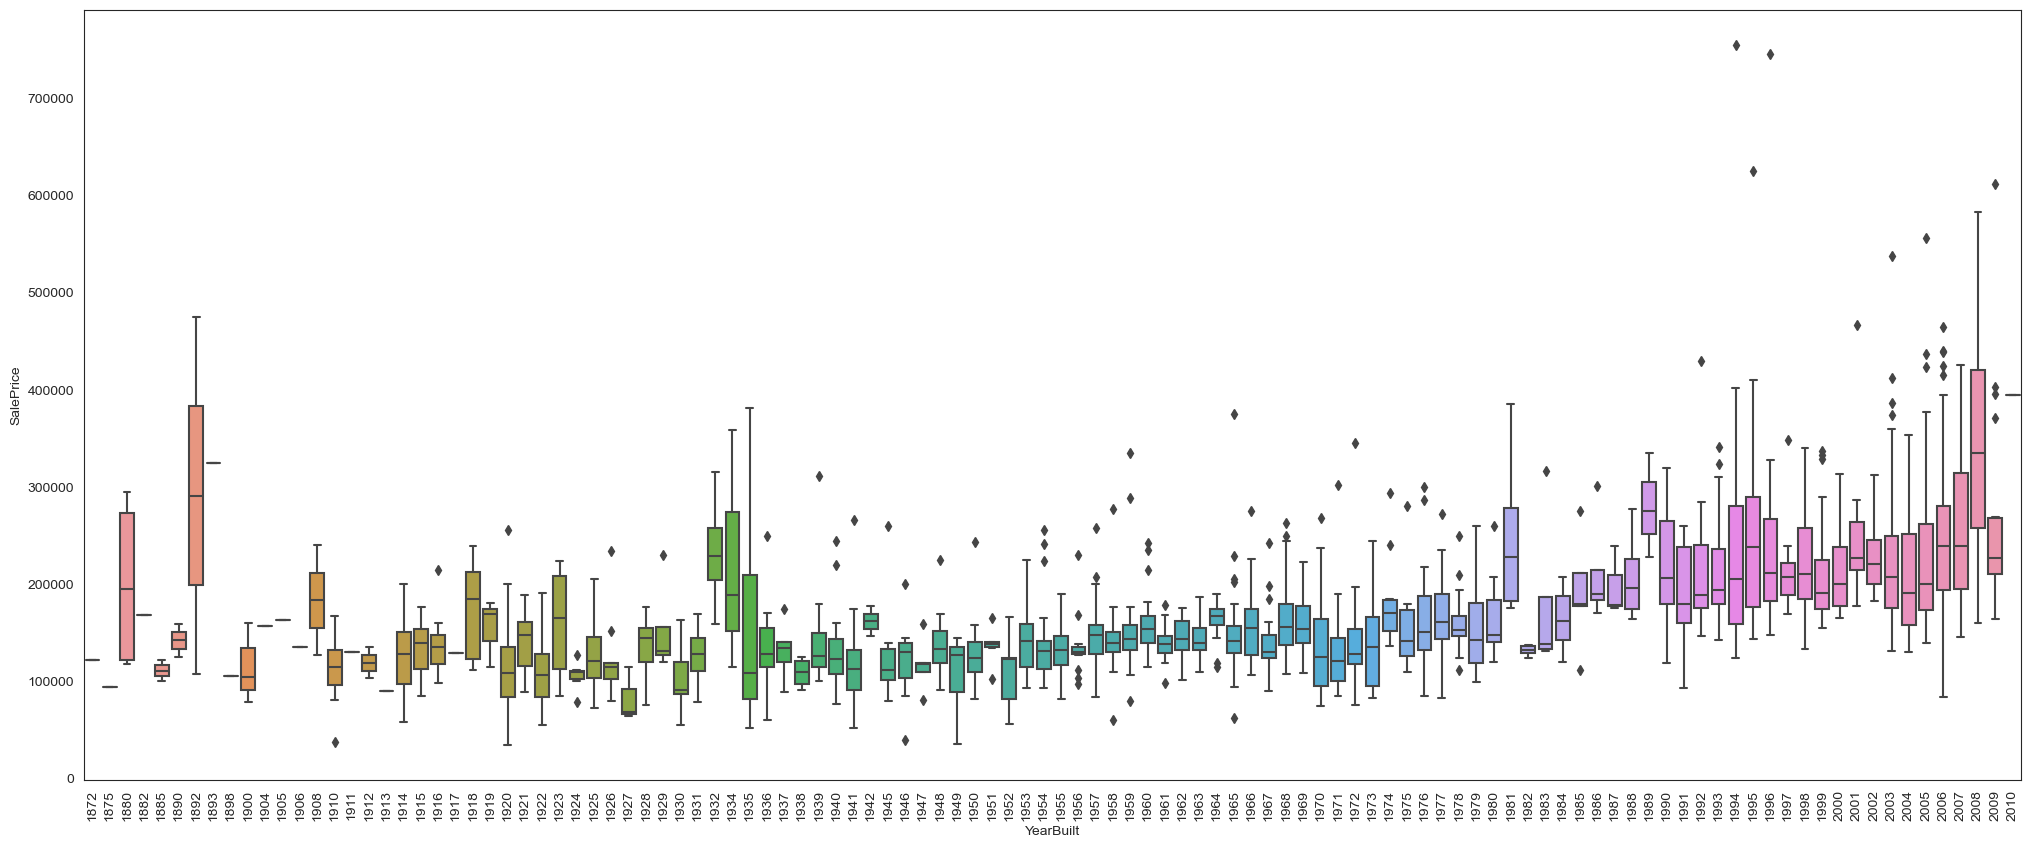

In [56]:
plt.figure(figsize=(25, 10))
ax = sns.boxplot(data=df_train, x="YearBuilt", y="SalePrice")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

### Continuous Features

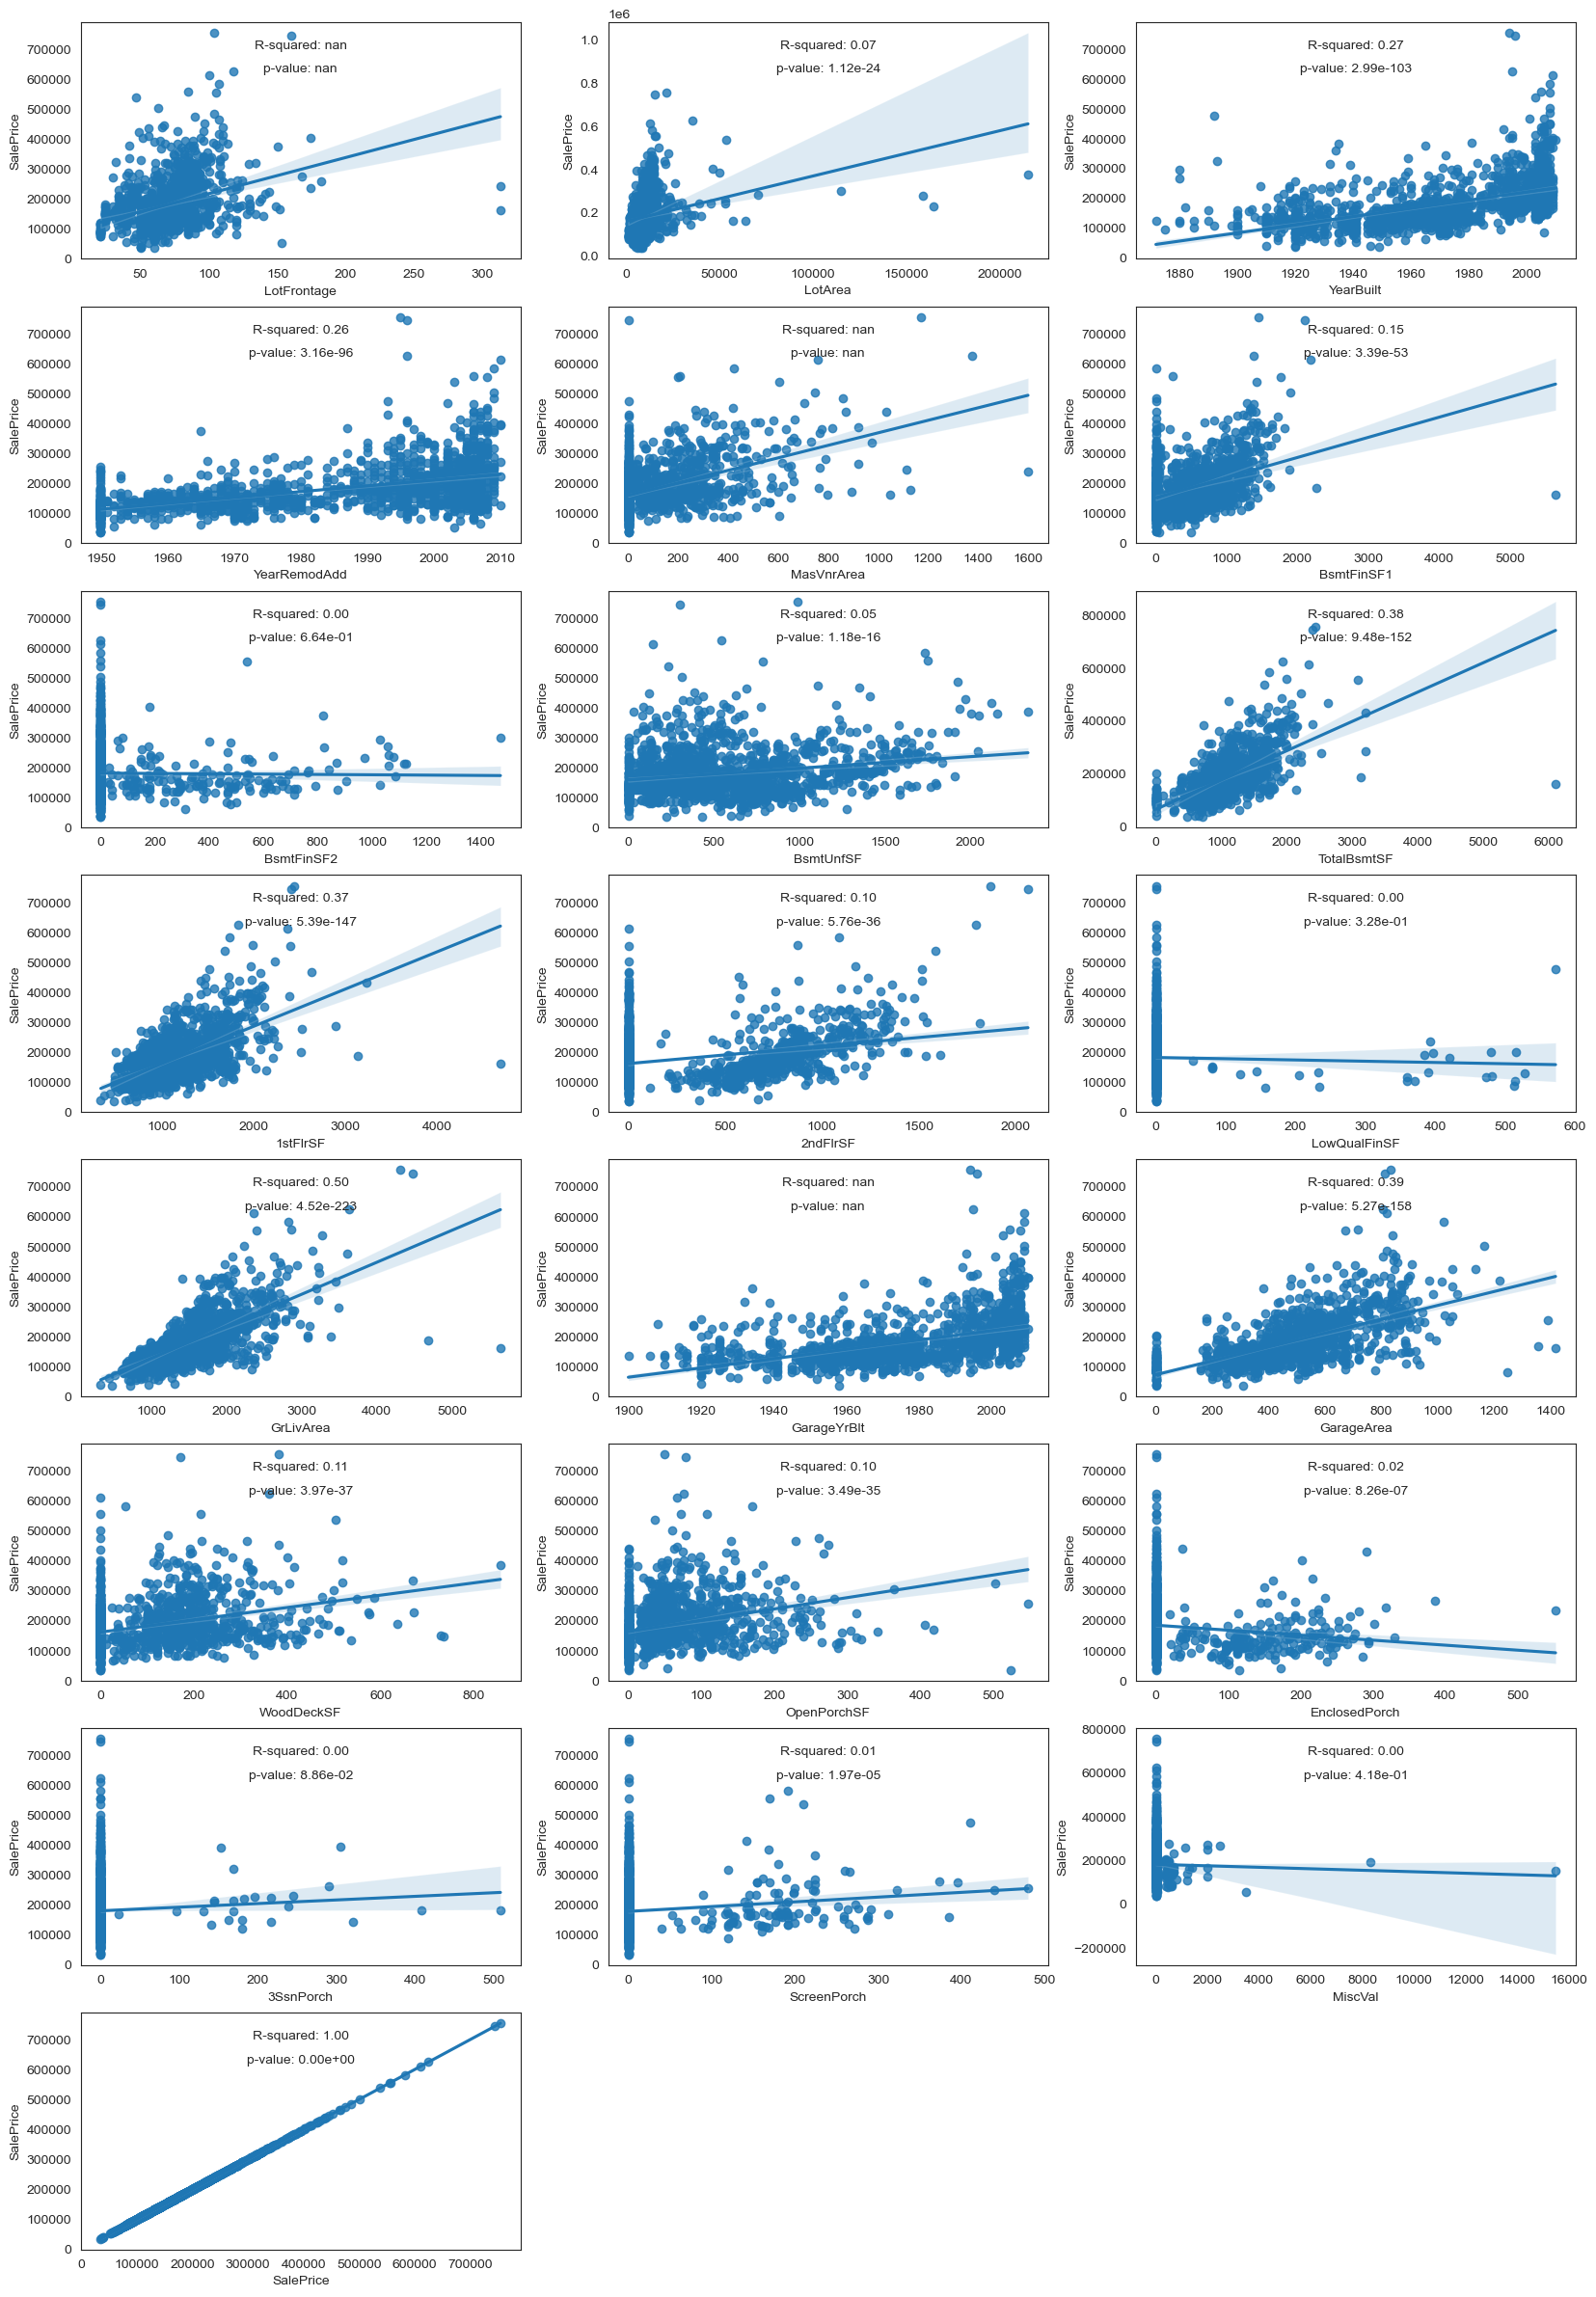

In [57]:
import scipy.stats as stats

# Set the number of rows and continuous_vars in the subplot grid
nrows = 8
ncols = 3

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a regplot for each column
for i, col in enumerate(continuous_vars):
    # Create the regplot
    sns.regplot(data=df_train, x=col, y="SalePrice", ax=axs[i])
    
    # Compute regression statistics
    x = df_train[col]
    y = df_train["SalePrice"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2

    # Add statistics to the plot
    axs[i].text(0.5, 0.9, f"R-squared: {r_squared:.2f}", ha='center', va='center', transform=axs[i].transAxes)
    axs[i].text(0.5, 0.8, f"p-value: {p_value:.2e}", ha='center', va='center', transform=axs[i].transAxes)

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Discrete Features

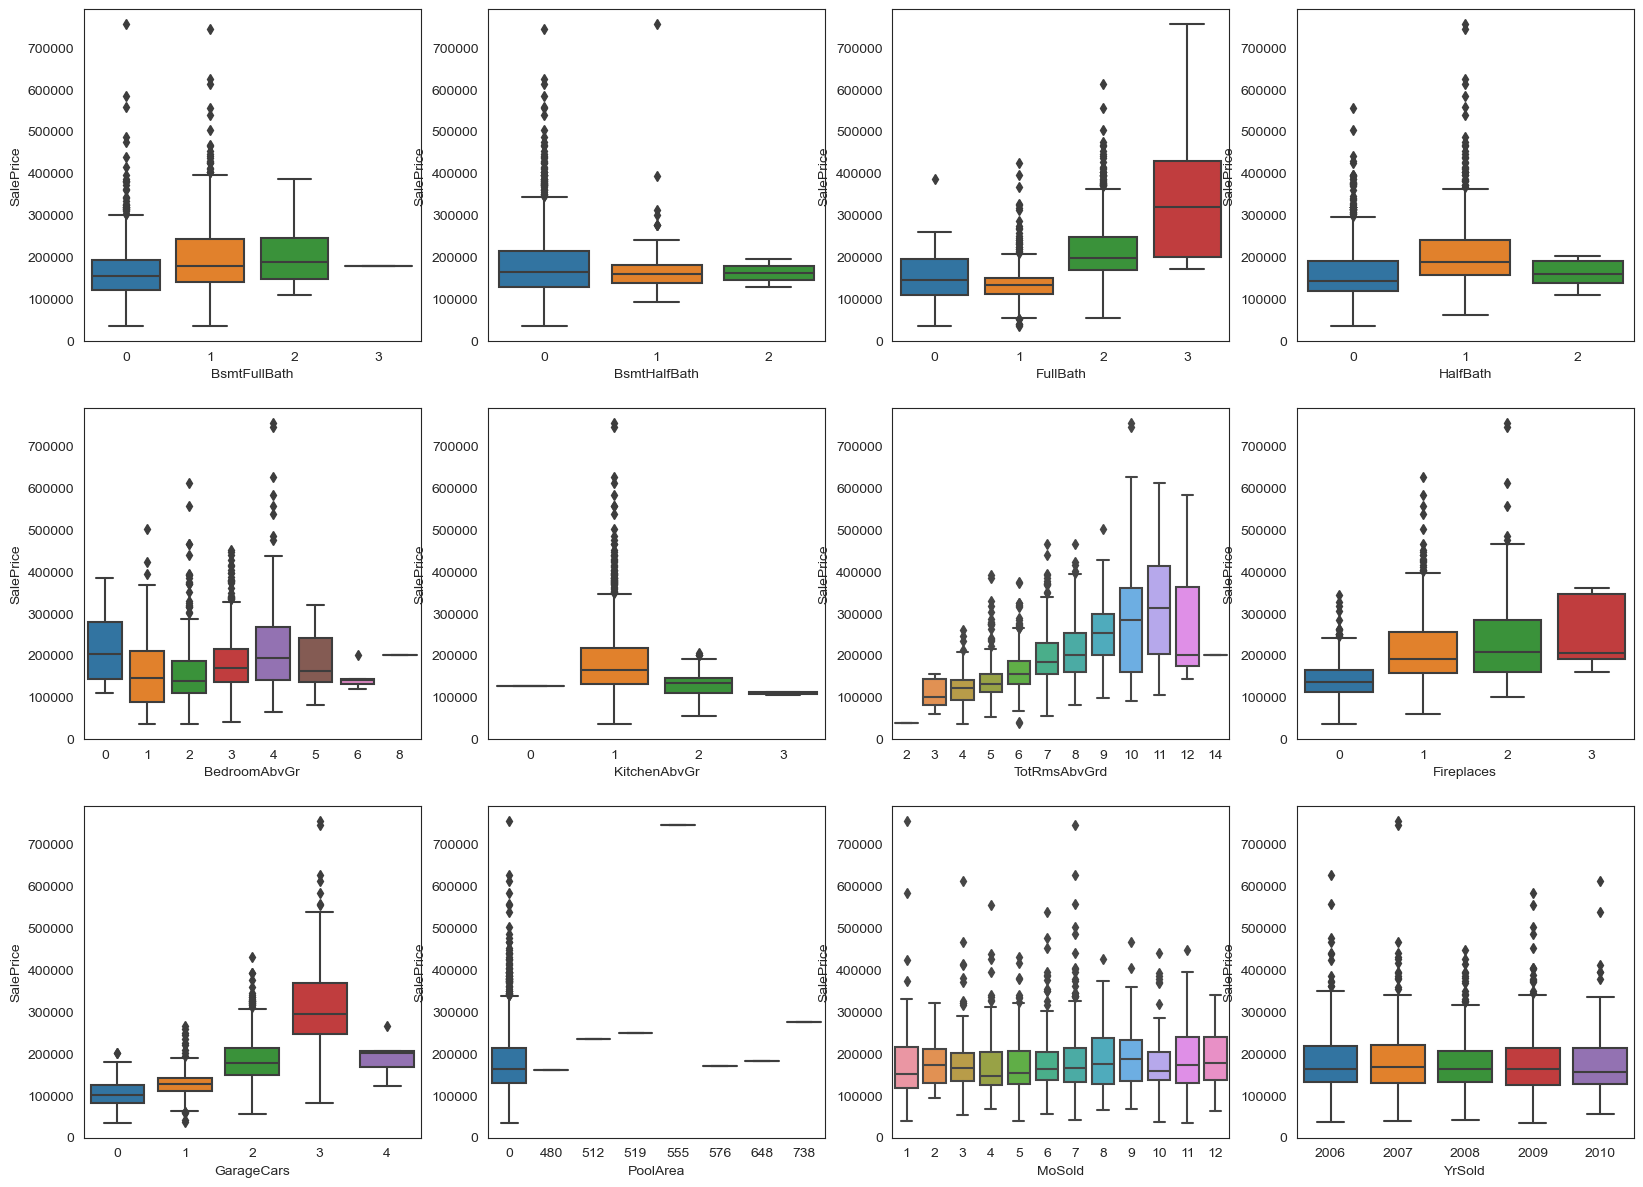

In [58]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 5
ncols = 4

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(discrete_vars):
    sns.boxplot(data=df_train, x=col, y="SalePrice", ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

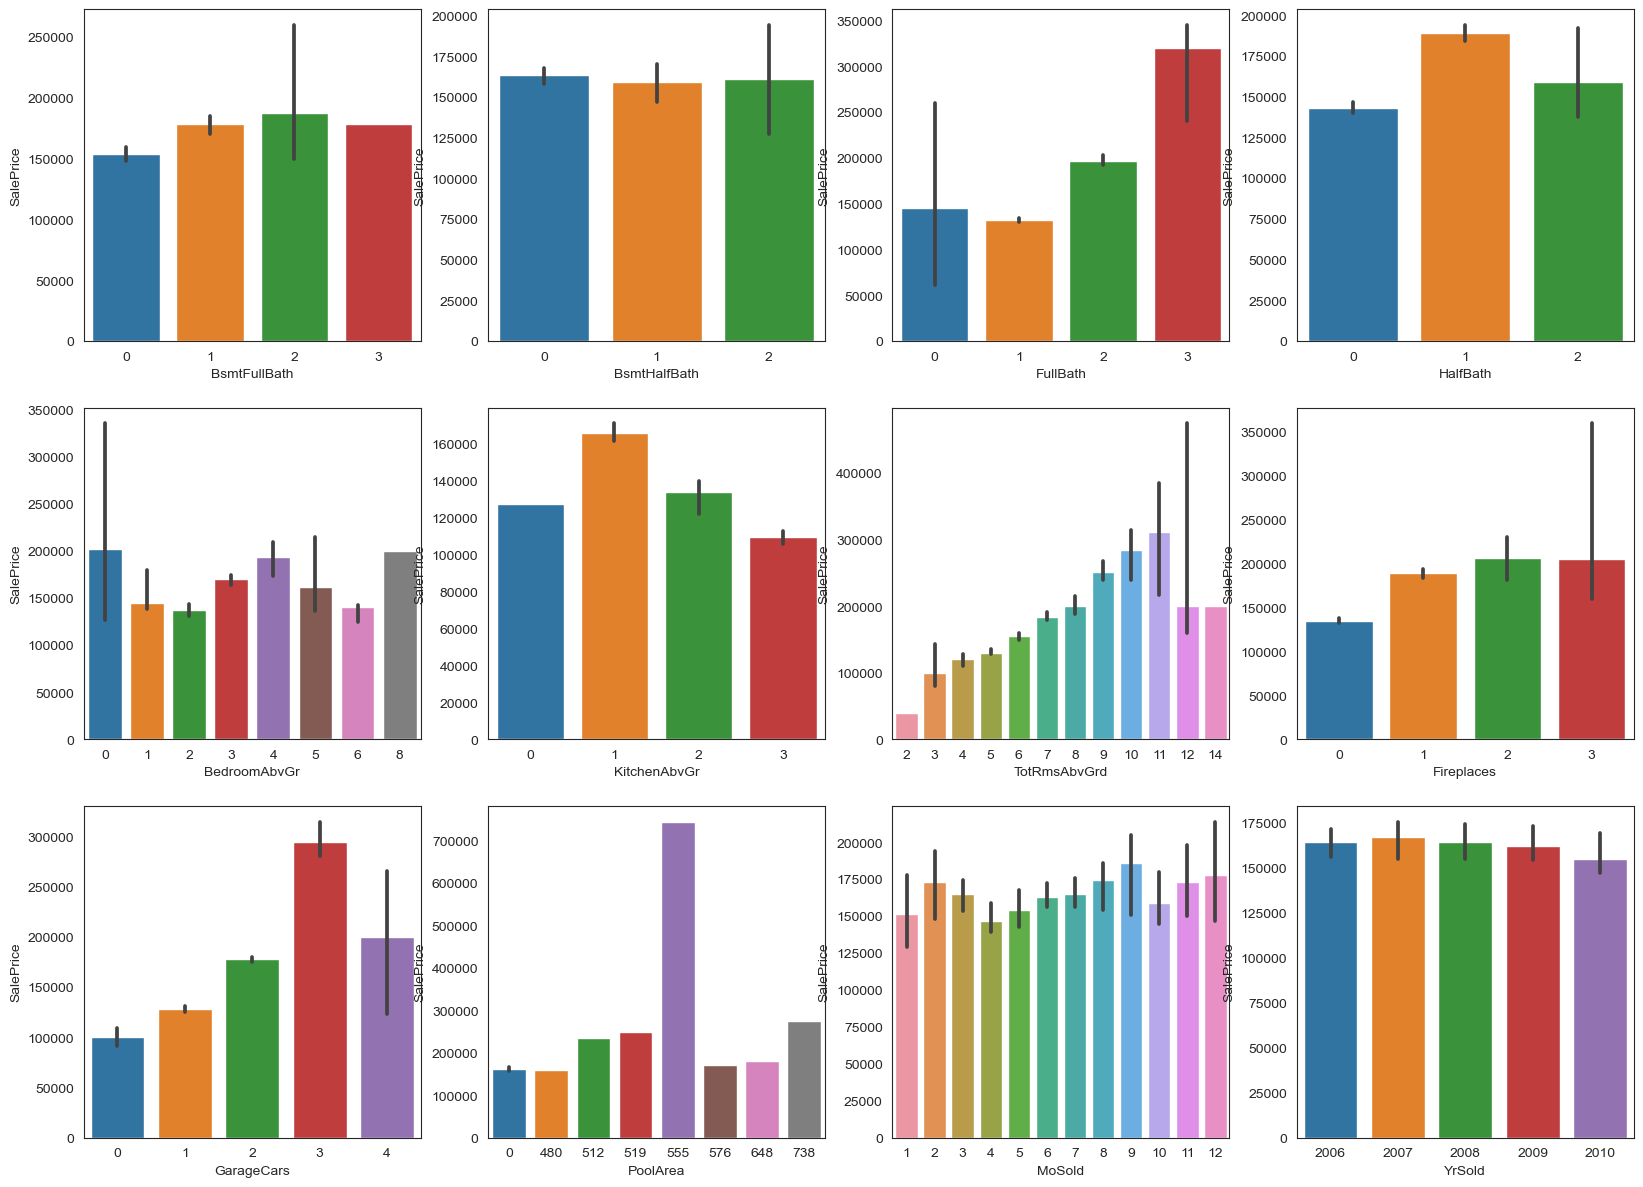

In [59]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 5
ncols = 4

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(discrete_vars):
    sns.barplot(data=df_train, x=col, y="SalePrice", ax=axs[i], estimator="median")

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Nominal Features

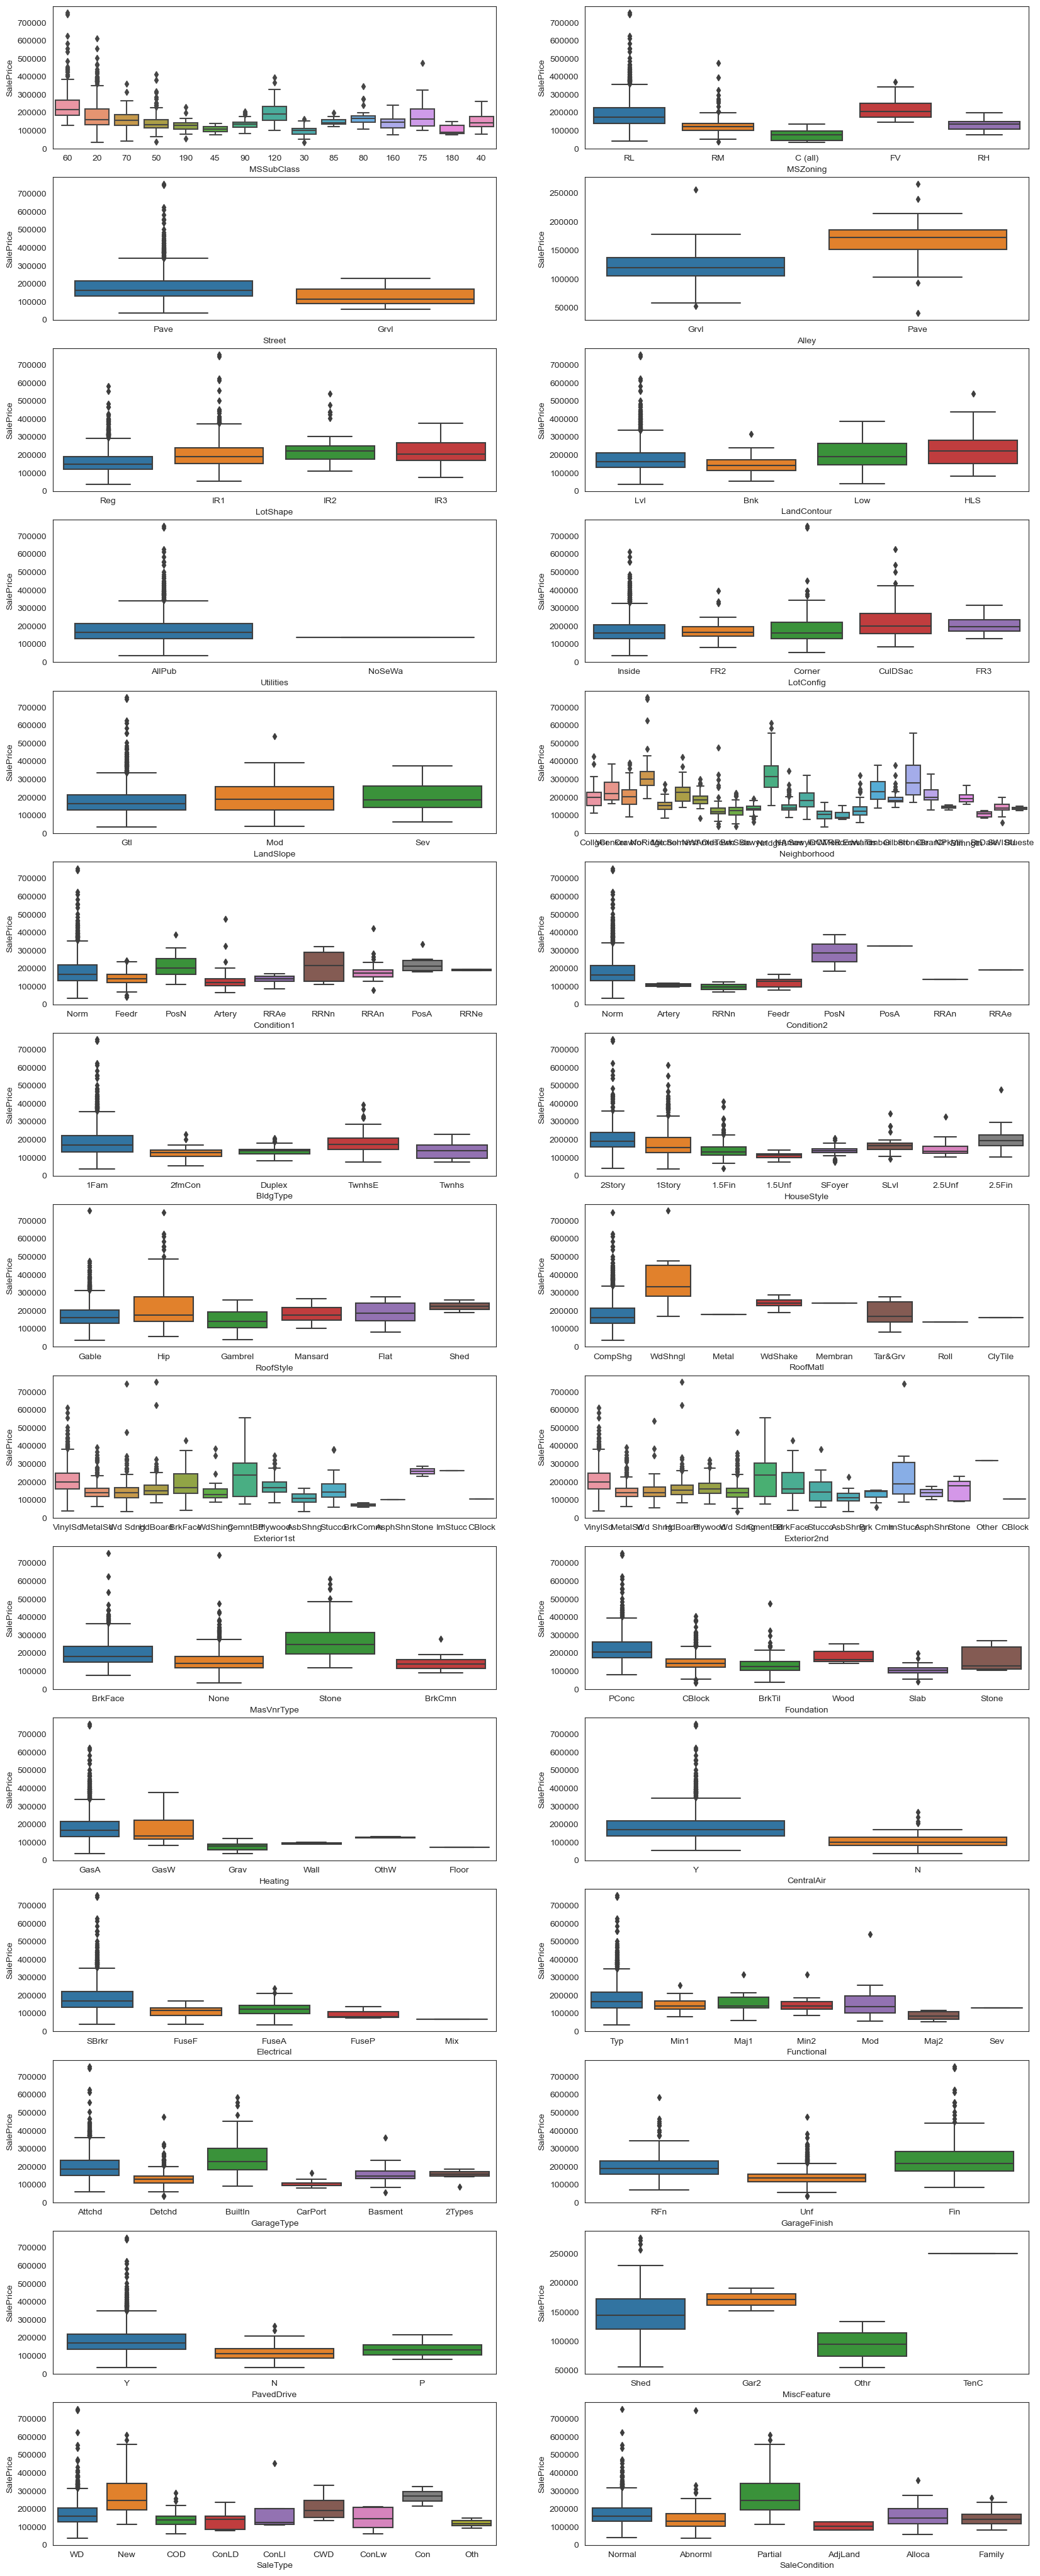

In [60]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 20
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 70))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(nominal_vars):
    sns.boxplot(data=df_train, x=col, y="SalePrice", ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

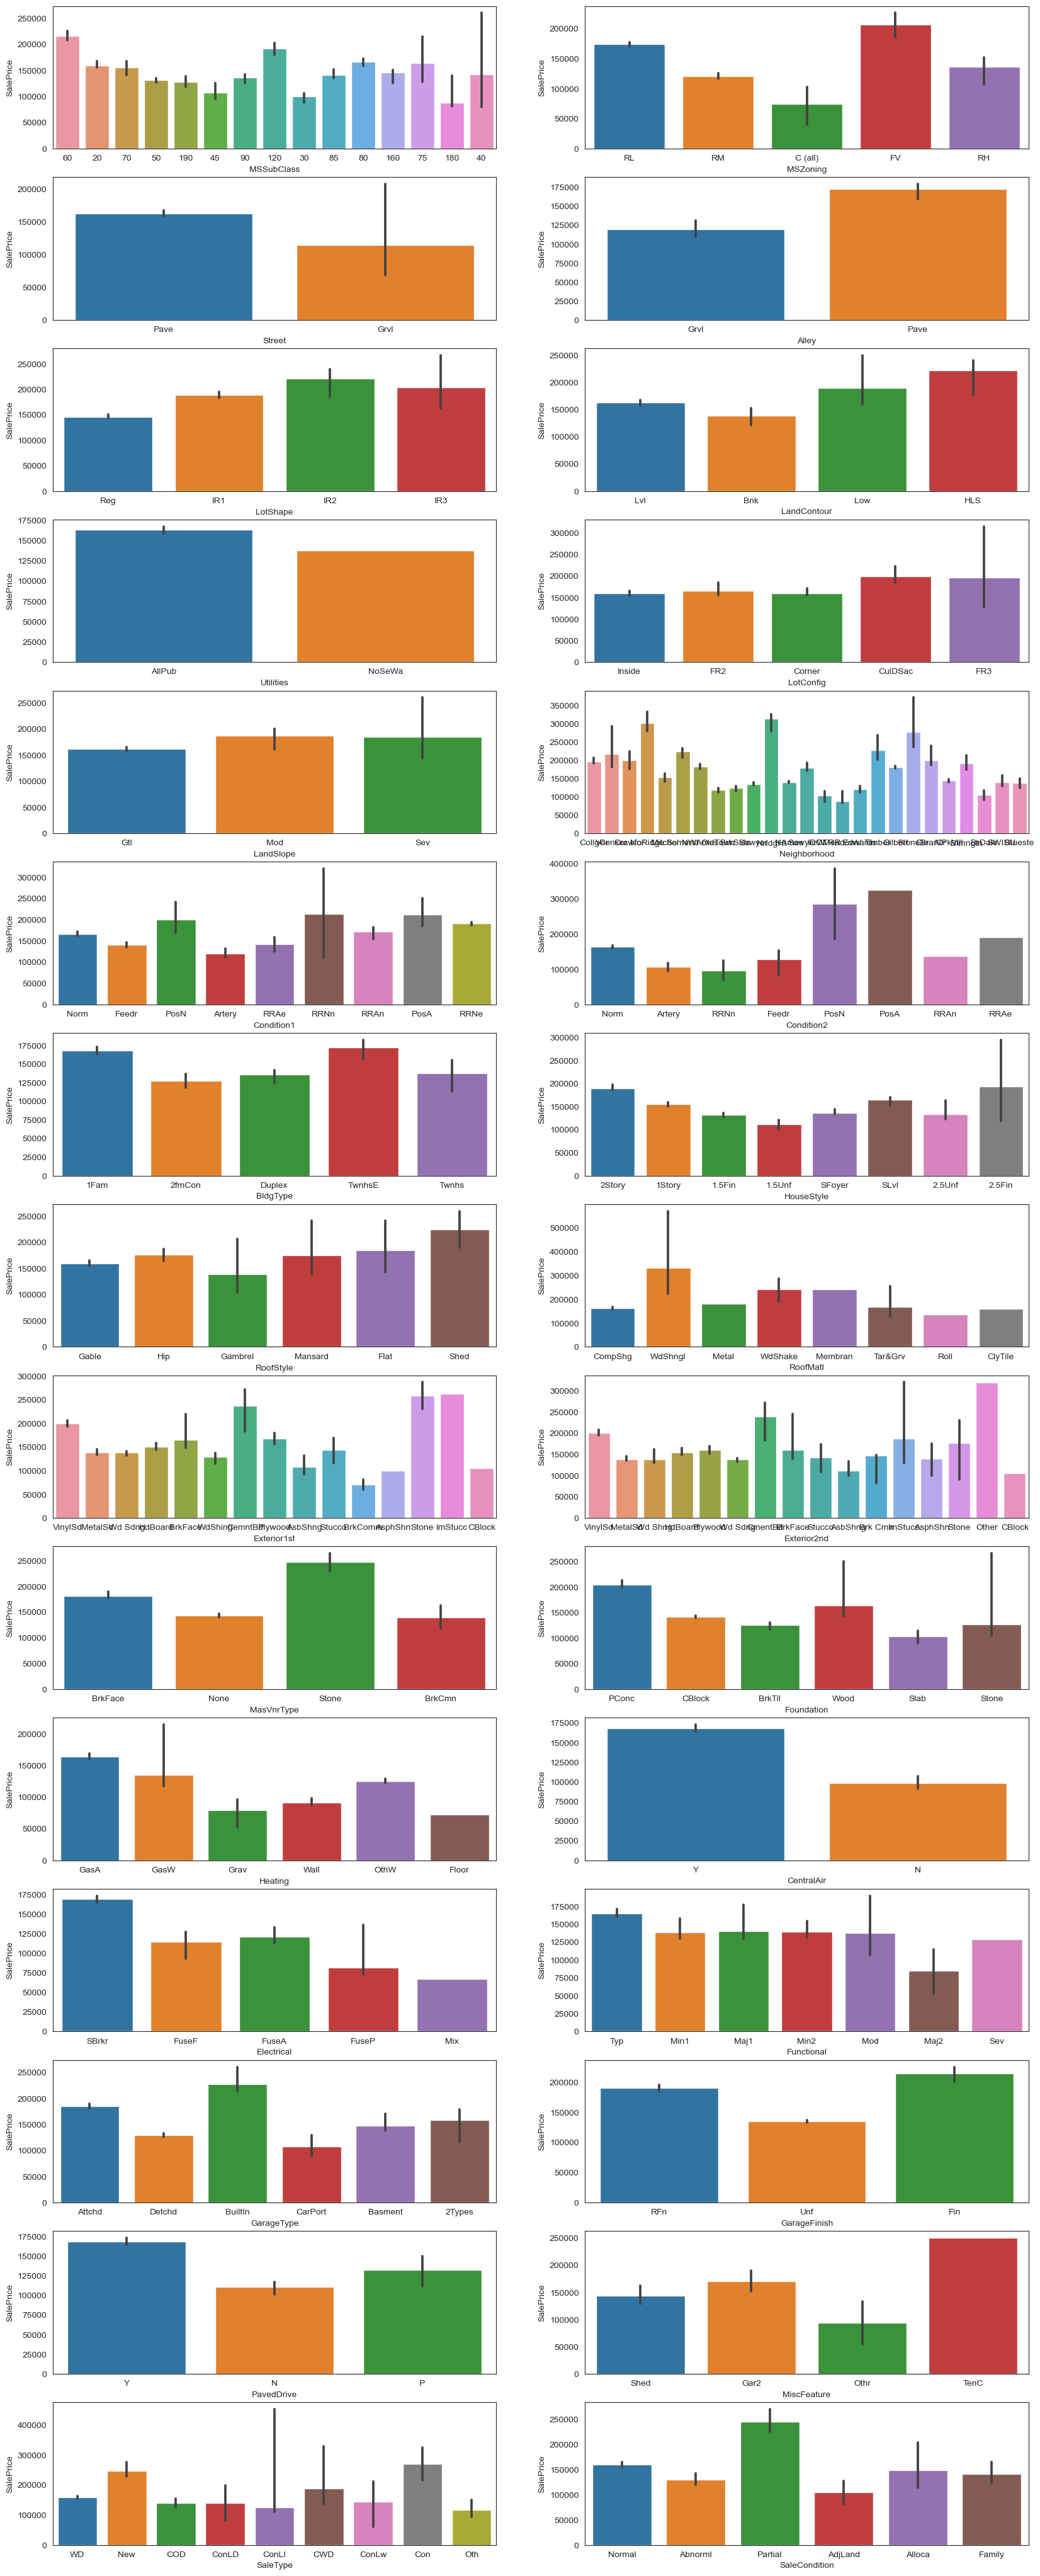

In [61]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 20
ncols = 2

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 70))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(nominal_vars):
    sns.barplot(data=df_train, x=col, y="SalePrice", ax=axs[i], estimator="median")

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

### Ordinal Features

IndexError: index 15 is out of bounds for axis 0 with size 15

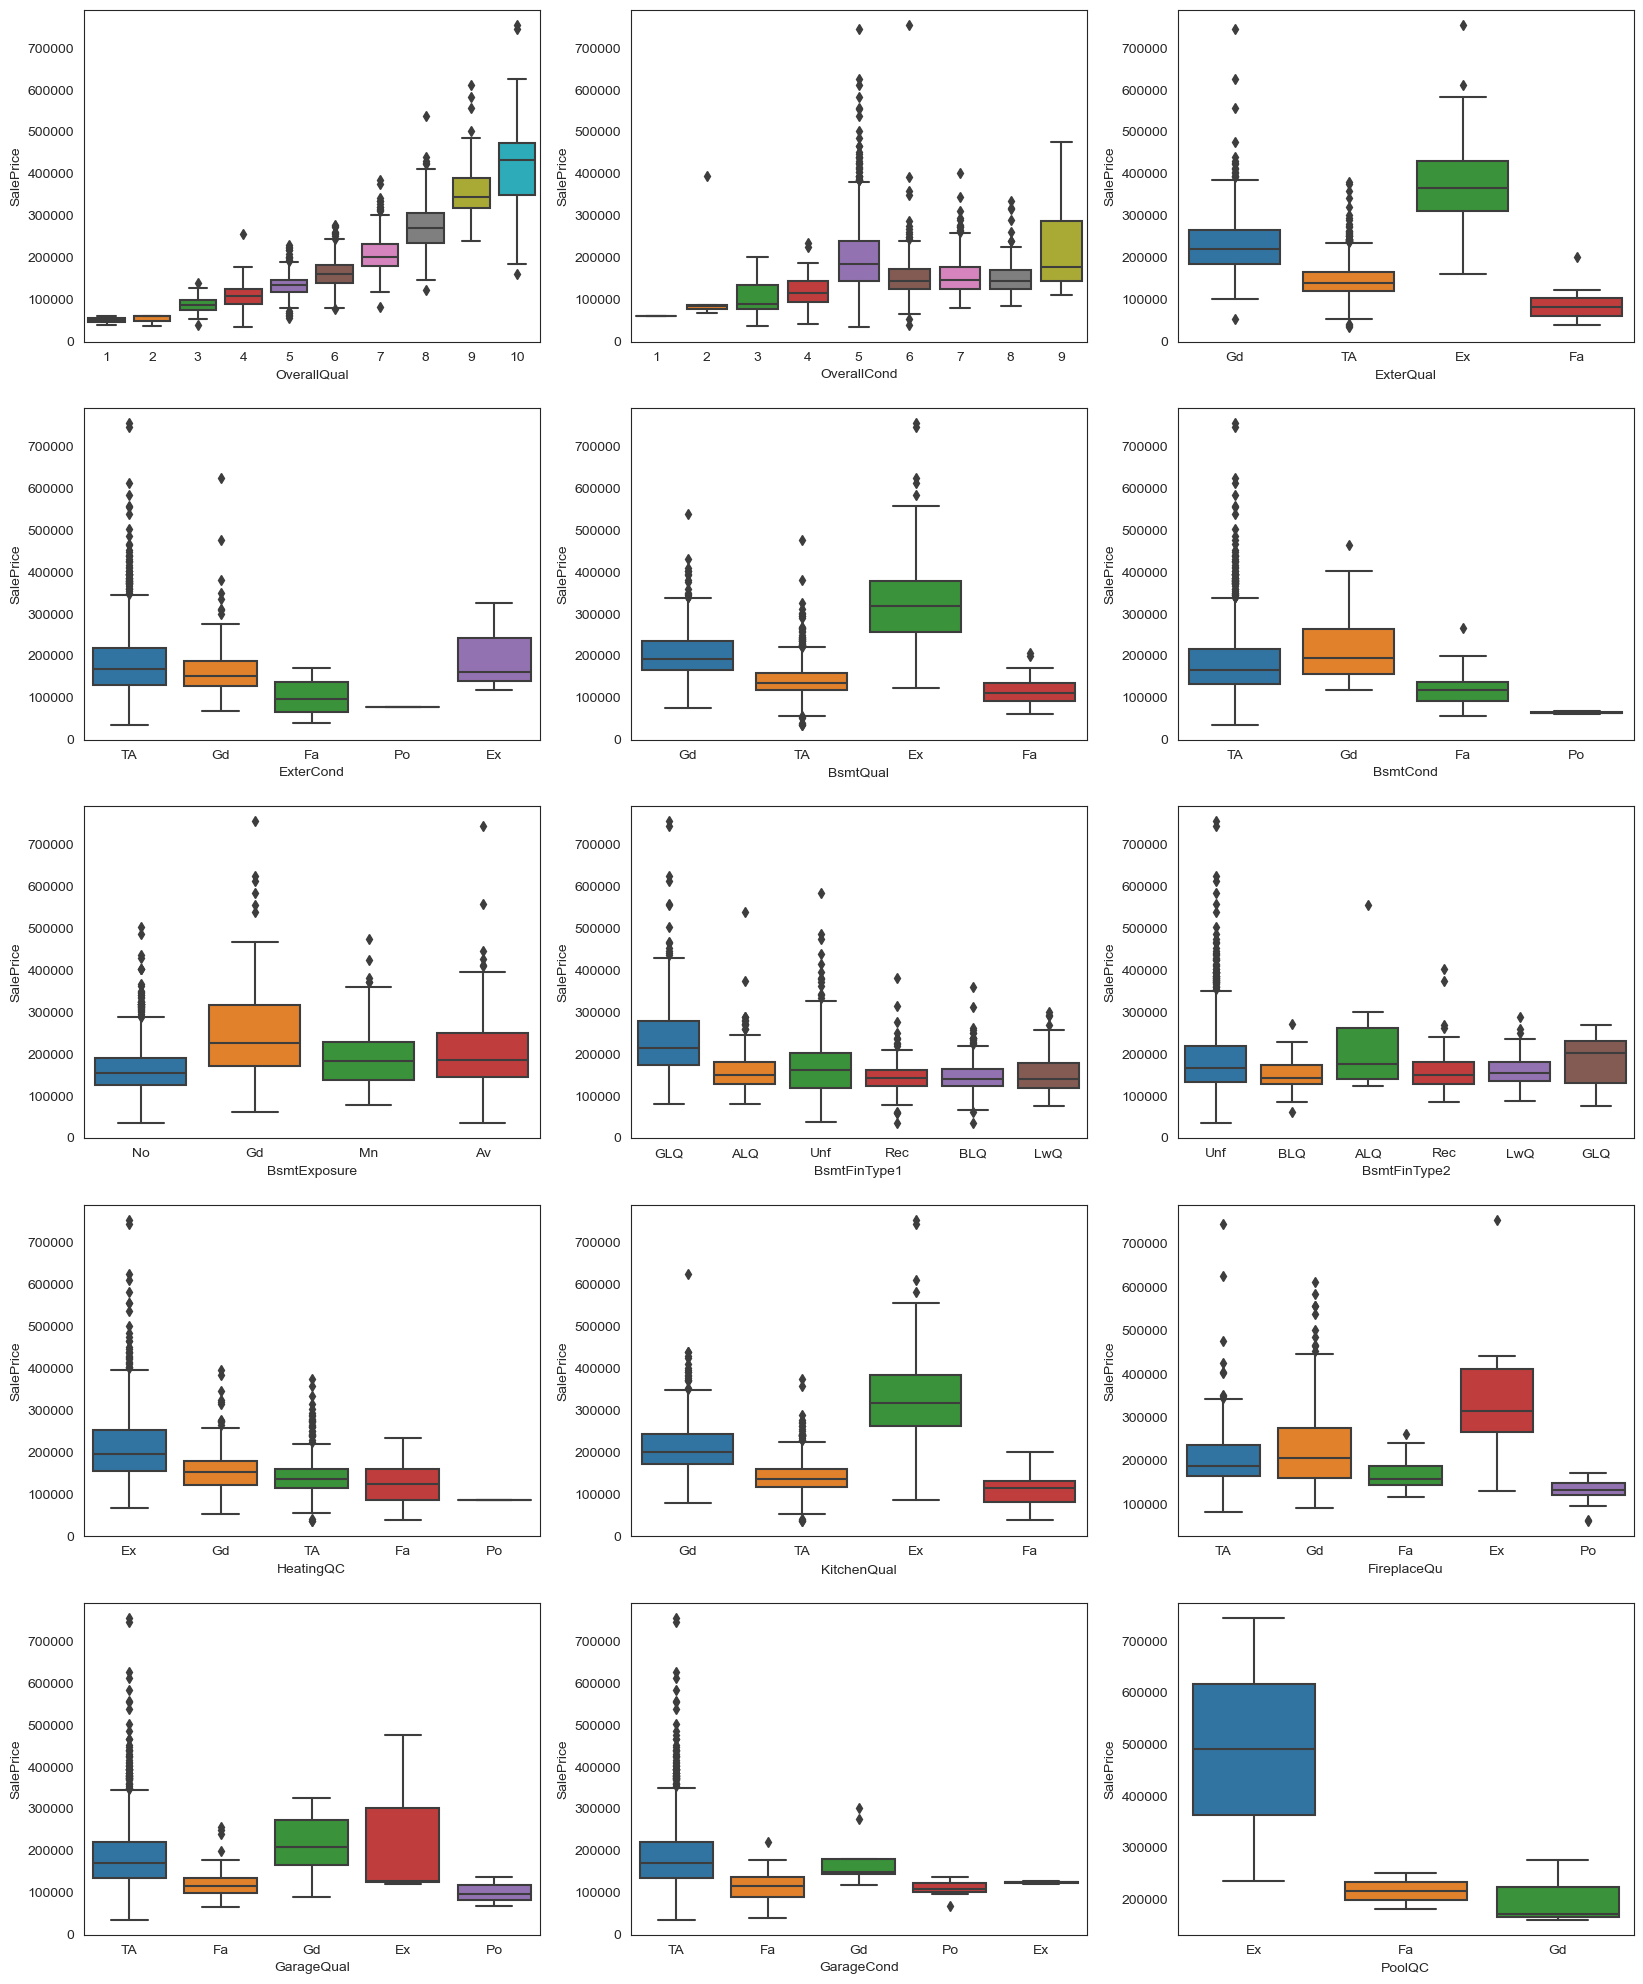

In [62]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 5
ncols = 3

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(ordinal_vars):
    sns.boxplot(data=df_train, x=col, y="SalePrice", ax=axs[i])

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

In [ ]:
# Set the number of rows and discrete_vars in the subplot grid
nrows = 5
ncols = 3

# Create a figure and an array of subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 25))

# Flatten the array of subplots into a 1D array
axs = axs.flatten()

# Iterate over the columns and plot a histplot for each column
for i, col in enumerate(ordinal_vars):
    sns.barplot(data=df_train, x=col, y="SalePrice", ax=axs[i], estimator="median")

# Remove empty subplots
for ax in axs[i+1:]:
    ax.remove()

# Show the plot
plt.show()

## New Combined Column

In [ ]:
# punya gua satu lagi
df_train['AgeSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['AgeRemodSold'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['OverallHouseScore'] = (df_train['OverallQual'] + df_train['OverallCond'])/2
df_train['GarageAge'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train['GarageAreaRatio'] = df_train['GarageArea'] / df_train["GarageCars"]
df_train['TotalLot'] = df_train['LotFrontage'] + df_train['LotArea']
df_train['TotalBsmtFin'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_train['YrBltAndRemod']=df_train['YearBuilt']+df_train['YearRemodAdd']
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['Total_sqr_footage'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasmasvnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmtfin'] = df_train['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_train["hasporch"] = df_train["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)